<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2021 - Homework 01</h1>

<h3 style="color:blue">2020-03-18</h3>

<h3 style="color:blue"> Authors: David Farré Gil, Blai Ras Jimenez, Irene Bonafonte Pardàs </h3>

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\expdist{\operatorname{Exp}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
***

<h1 style="color:blue">Instructions</h1>

Solutions should be submitted by groups of about three students (meaning: two is OK, four is not advisable but possible. Individual homeworks 
will also be accepted but collaborative work is preferable). If you happen to be isolated (one sad consequence of this remote teaching we suffer) 
you can use the Virtual Campus Forum to ask for coworkers. Please send me an email with the team members names as soon as you have formed it.

Only one copy of each group's work must be uploaded (by any member), clearly stating the names of all contributors. 

Format: As a Jupyter or R Markdown notebook. 

Completed assignments are due on Tuesday, April 6. They are to be uploaded to the Virtual Campus.

<h1 style="color:blue">01 - An elementary probability problem</h1>

<h2 style="color:blue">A standard (Total probabilities/Bayes formula) exercise</h2>

_I expect you will solve it in the light of this course specific concepts of likelihood and prior-posterior pdf's. 
Also you should add a simulation to illustrate the problem (and validate your analytical solution)._

## Exercise 1.1.
A box contains $M+1$ coins ($M\geq0$). One of the coins has heads on both sides but all the other coins are fair coins. 
    You choose at random one of the coins and toss it repeatedly. Given that the first $m+1$ tosses $(0\leq m\leq M)$ all have resulted in heads, 
    find the probability that you have chosen the two-headed coin, as a function of $m$ and $M$. 



### Analytical solution

Following Bayes theorem:

$$
P(\text{unfair coin } | \text{ all heads}) = \frac{P(\text{all heads } | \text{ unfair coin}) \cdot P(\text{unfair coin})}{P(\text{all heads})} = *
$$

Following the total probability theorem:

$$
P(\text{all heads}) = P(\text{all heads } | \text{ unfair coin}) \cdot P(\text{unfair coin}) + P(\text{all heads } | \text{fair coin}) \cdot P(\text{fair coin})=
$$
$$
= 1 \cdot \frac{1}{M+1} + \frac{1}{2^{m+1}} \cdot \frac{M}{M+1} = \frac{1}{M+1} \cdot (1 + \frac{M}{2^{m+1}})
$$

$$
* = \frac{\frac{1}{M+1}}{(\frac{1}{M+1})\cdot(1+\frac{M}{2^{m+1}})} = \frac{1}{1+\frac{M}{2^{m+1}}} = \frac{2^{m+1}}{M+2^{m+1}}
$$


### Solving the problem by simulation

Here, we will study the problem by simulating, for different values of M and m, that we pick a coin (from a total of M coins) for 20,000 different experiments, by sampling from a Bernoulli distribution. We will then simulate, for each coin, the number of heads that we obtain when flipping each coin m times, using a binomial distribution with probability of success 0.5 or 1, as corresponding. Finally, we can compute the posterior probability, $P(\text{unfair coin } | \text{ all heads})$ as the frequency of unfair coins among all those coins that have resulted in m heads in our simulation.

In [15]:
sample_size <- 20000
record <- NULL

for (M in seq(from = 10, to = 500, by = 10)){
  for (m in c(2, 5, 10, 20)){
    if (m <= M){
      # Choose a random coin (using a Bernoulli trial)
      coin <- rbinom(n = sample_size, size = 1, prob = 1/(M+1))
      
      # Probability of heads
      # 1 if the coin is faulty (1) 0.5 otherwise
      head_prob <- ifelse(coin==1, 1, 0.5)
      
      # For each coin, we simulate the result of m trials
      # using rbinom, which randomly samples from the defined
      # binomial distribution
      heads <- rbinom(n = sample_size, size = m, prob = head_prob)
      
      # Probability of coin == 1 given that heads appears m times (posterior probability)
      empiric_prob <- sum(coin[heads == m])/sum(heads == m)
      theoretical_prob <- 1/(1 + M*0.5^(m+1))
      
      # Store the results
      temp <- data.frame(M=M, m=m, empirical_posterior=empiric_prob, theoretical_posterior=theoretical_prob)
      record <- rbind(record, temp)      
    }
  }
}

As observed in the plots below, the larger the number m consequtive tosses in which head appears, the larger the posterior probability of the coin being faulty. This is due to an increase in the likelihood. Conversly, when the total number M of coins increases, the prior probability of the coin being faulty decreases, and so does the posterior probability. It is interesing to note that, when the theoretical posterior probability is very close to 0 or to 1, the empirical probability is a very good approximation of the theoretical probability. However, when the probability is less extreme, there is a greater discrepancy between the theoretical and the empirical posterior.

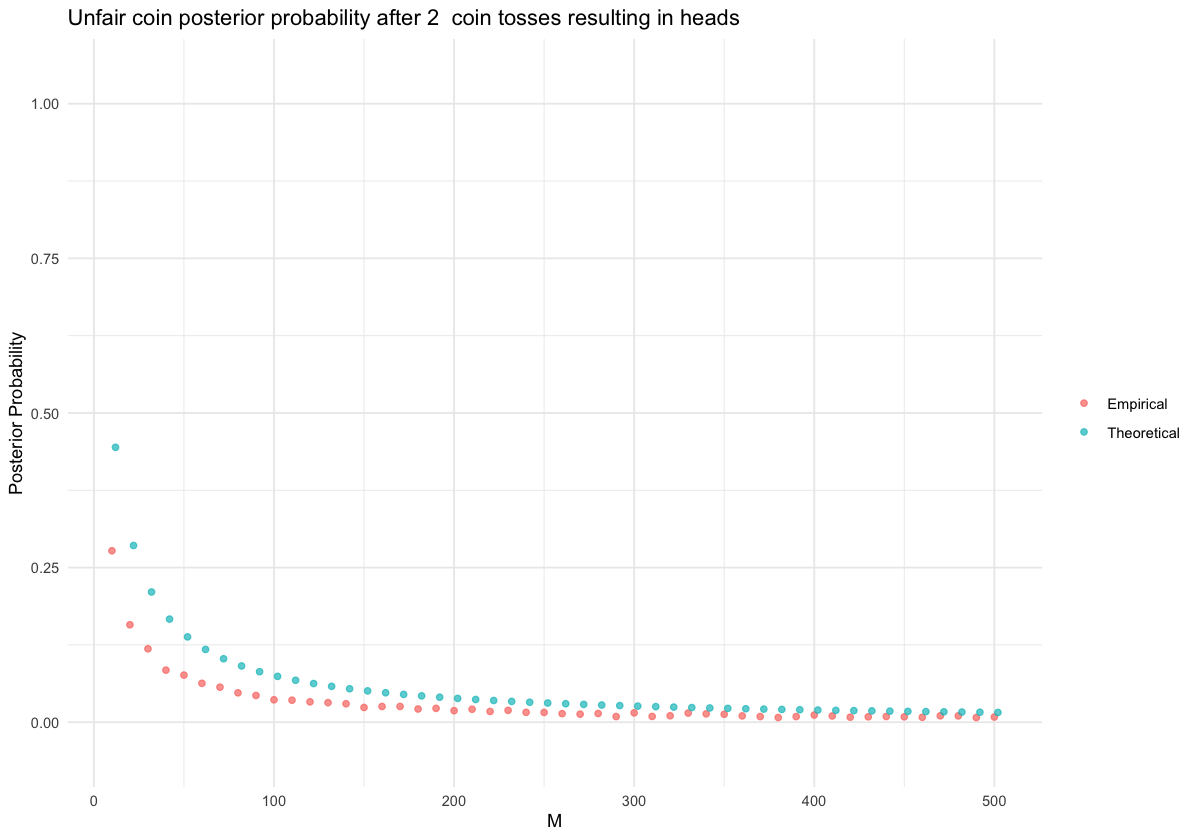

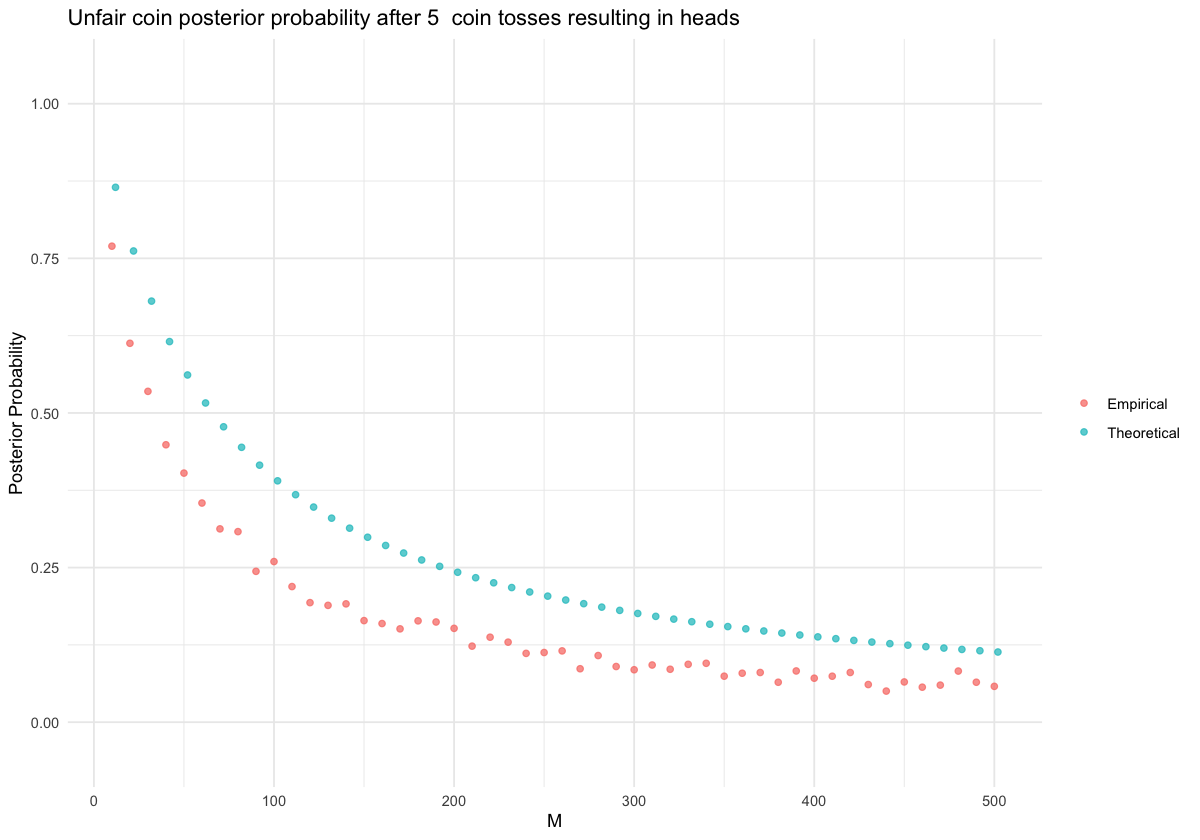

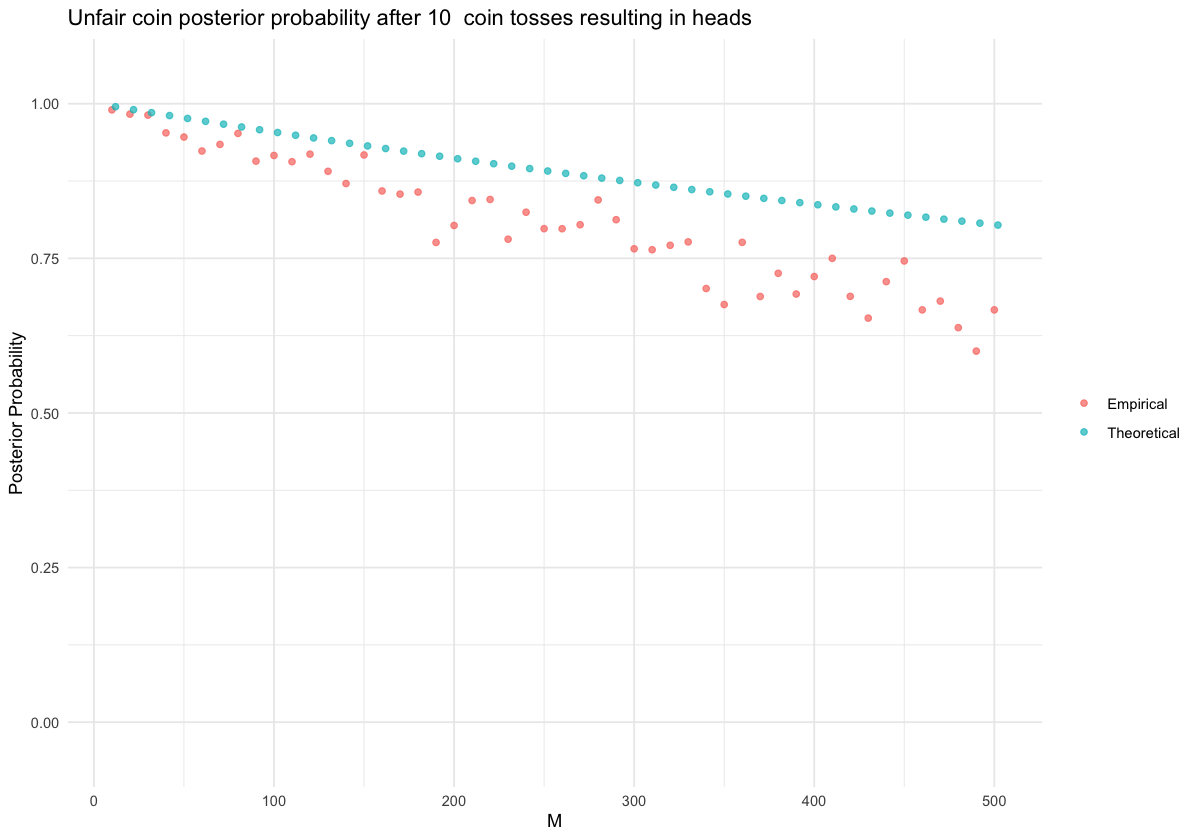

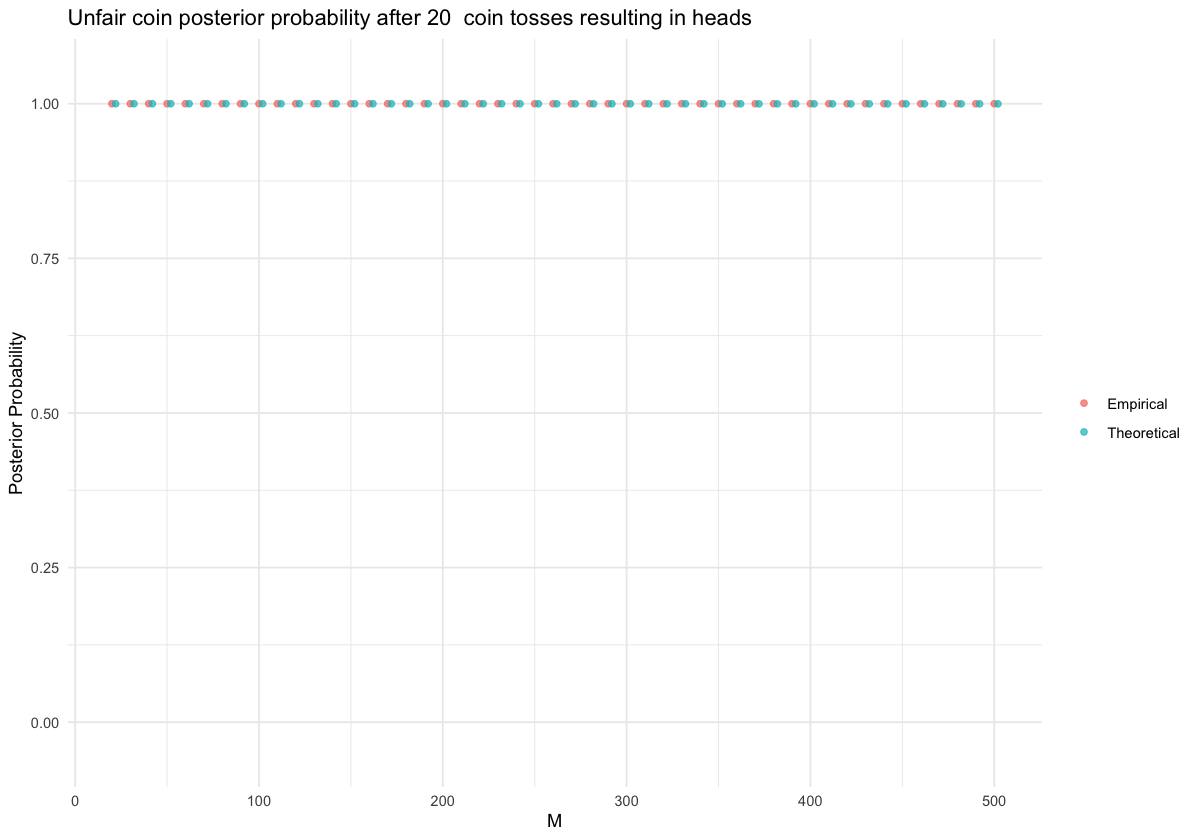

In [16]:
library(ggplot2)
options(repr.plot.width=10,repr.plot.height=7)

for (m in c(2, 5, 10, 20)){
  dt <- record[record$m == m, 1:3]
  dt$Posterior <- "Empirical"
  
  dt2 <- record[record$m == m, c(1,2,4)]
  dt2$M <- dt2$M + 2
  dt2$Posterior <- "Theoretical"
  
  colnames(dt)[3] <- colnames(dt2)[3] <- "Posterior Probability"
  dt <- rbind(dt,dt2)
  p <- ggplot(dt, aes(x=M, y=`Posterior Probability`, color=Posterior)) + geom_point(alpha=0.7) + theme_minimal() + theme(legend.title = element_blank()) + ylim(-0.05,1.05) + ggtitle(paste("Unfair coin posterior probability after", m, " coin tosses resulting in heads"))
  
  print(p)
}

## Exercise 1.2.

A box contains $M+1$ biased coins ($M\geq0$), indexed from $0$ to $M$, such that coin $i$ lands heads with probability $\dfrac{i}{M+1}$, for $0\leq i\leq M$. 
   You choose at random one of the coins and toss it repeatedly. Given that the first $m+1$ tosses ($0\leq m\leq M$) all have resulted in heads, 
   find the probability that you have chosen coin $i\in[0,M]$.
   
### Analytical solution

Let us first take a look at the probability tree of this problem, where "H" means the coin landed on "heads" and T means "tails":

<img src="img/ProbabilityDiagram.PNG">

Following the total probability theorem:

$$
P(\text{m+1 heads}) = \sum_{j=0}^M P(\text{m+1 heads } | \text{ head}_j) \cdot P(head_j) = \sum_{j=0}^M (\frac{j}{M+1})^{m+1} \cdot \frac{1}{M+1}
$$

Following Bayes theorem:

$$
P( heads_i | \text{ m+1 heads}) = \frac{P(\text{m+1 heads } | heads_i) \cdot P(heads_i)}{P(\text{m+1 heads)}} = \frac{(\frac{i}{M+1})^{m+1} \cdot \frac{1}{M+1}}{\frac{1}{M+1} \cdot \sum_{j=0}^M (\frac{j}{M+1})^{m+1}} = \frac{i^{m+1}}{\sum_{j=0}^M j^{m+1}}
$$
Side notes:
$$
\\
(\frac{i}{M+1})^{m+1} = \frac{i^{m+1}}{(M+1)^{m+1}} \\
\frac{1}{M+1} \cdot \sum_{j=0}^M (\frac{j}{M+1})^{m+1} = \frac{1}{(M+1)^{m+2}} \cdot \sum_{j=0}^M j^{m+1} (\text{applying common factor})
$$

### Solving the problem by simulation

In this second exercise, for each of the 20,000 experiments, we pick a coin i from a total of M coins by using the "sample" function, which picks n examples from a sample with uniform probability (and with replacement). The probability of a particular coin landing on heads is $p_i=\frac{i}{M+1}$. As in the previous exercise, we flip each coin m times by generating a random value from a binomial distribution with $p_i$ probability of heads. The posterior probability, $P(\text{coin} == i | \text{all heads})$ can be estimated from the simulation as the frequency of coins==i among all those coins that have resulted in m heads in our simulation.

In [4]:
require("ggplot2")

In [7]:
sample_size <- 20000
record <- NULL

for (M in seq(from = 10, to = 500, by = 10)){
  for (m in c(2, 5, 10, 20)){
    if (m <= M){
      # Choose a random coin (from 0 to M, with uniform probability)
      # 20,000 times (20,000 experiments)
      coin_i <- sample(0:M, sample_size, replace=TRUE)
      
      # Probability of heads for each coin
      head_prob <- coin_i/(M+1)
      
      # For each coin, simulate number of heads in m trials using rbinom
      heads <- rbinom(n = sample_size, size = m, prob = head_prob)
      
      # Probability of coin == 1 given that heads appears m times
      empiric_prob <- sapply(unique(coin_i), function(i){sum((coin_i == i)[heads == m])/sum(heads == m)}, USE.NAMES = TRUE)
      theoretical_prob <- sapply(unique(coin_i), function(i){i^(m+1) / sum((0:M)^(m+1))})
  
      # Store the results
      temp <- data.frame(M=M, m=m, empirical_posterior=empiric_prob, theoretical_posterior=theoretical_prob, coin_i=unique(coin_i))
      record <- rbind(record, temp)
    }
  }
}
record$diff <- sqrt((record$empirical_posterior - record$theoretical_posterior)^2)

As shown in the plots below, an increase in the likelihood (either due to an increase of the m number of consecutive heads, or to an increase of the probability $p_i$ of heads) increases the posterior probability of a coin i. Converesely, a decrease in the prior due to an increase of the total number of coins, reduces the posterior probability of a coin i. As in the previous exercise, the more extreme the posterior probability, the higher the concordance between the theoretical posterior and the posterior obtained by simulation. Increasing the number of experiments should further reduce these differences.

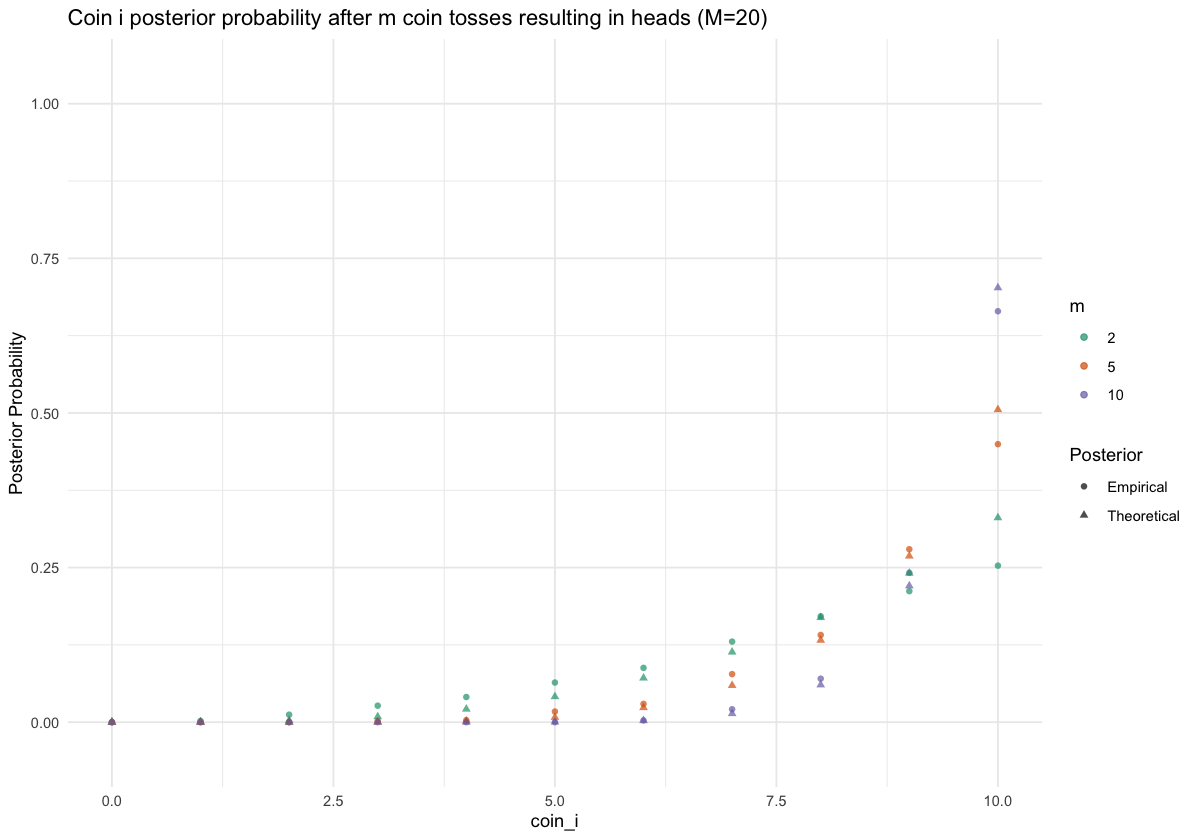

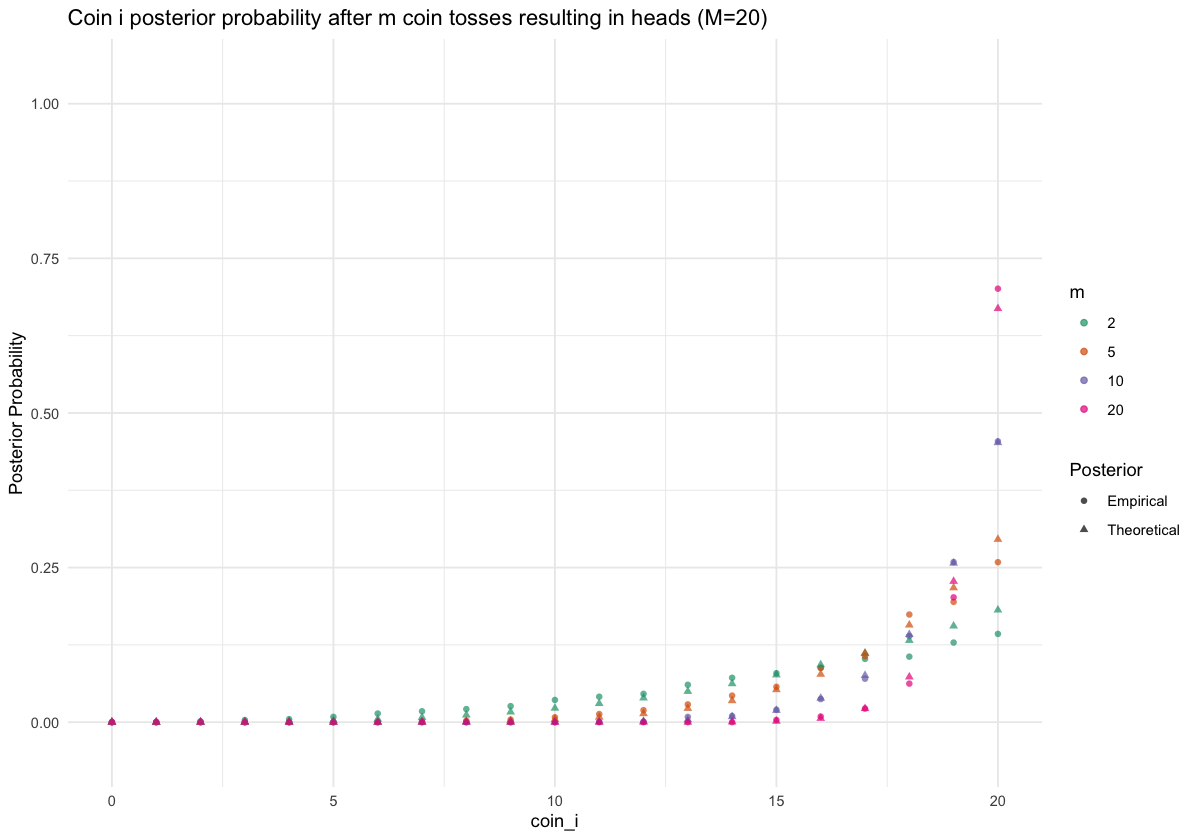

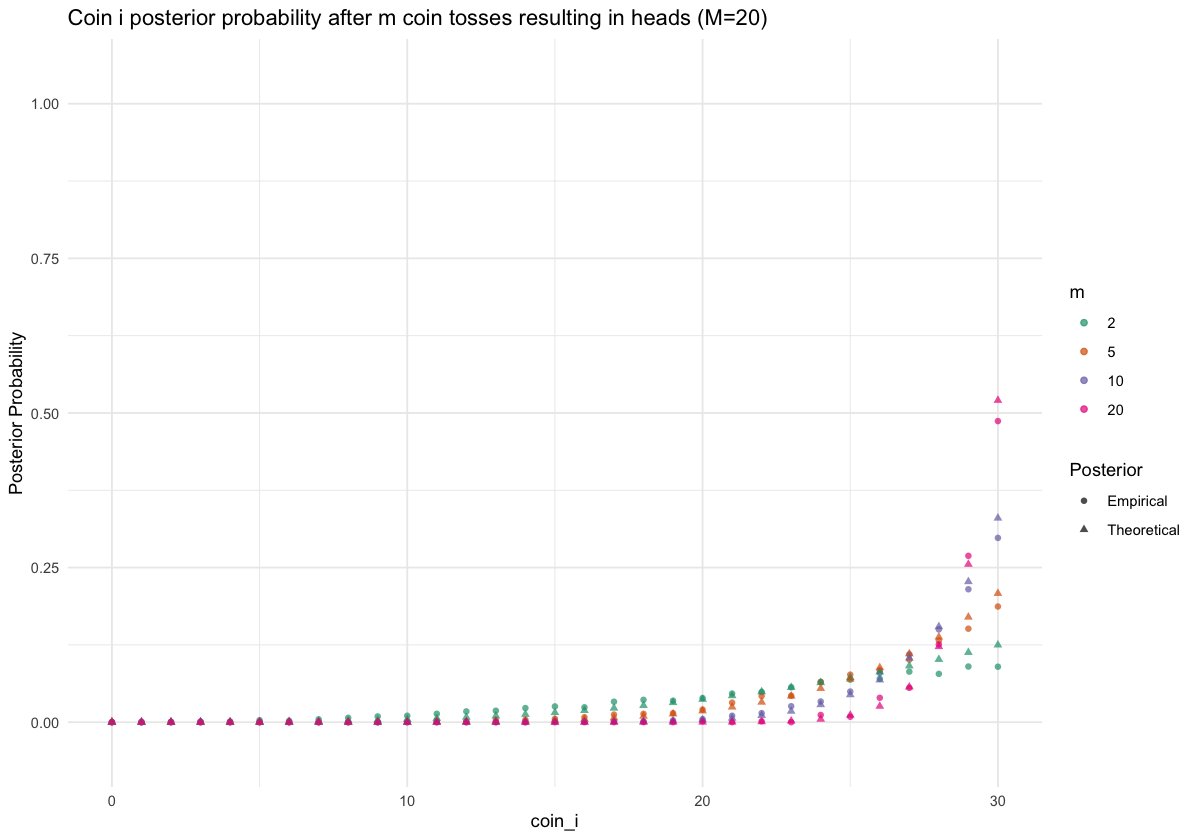

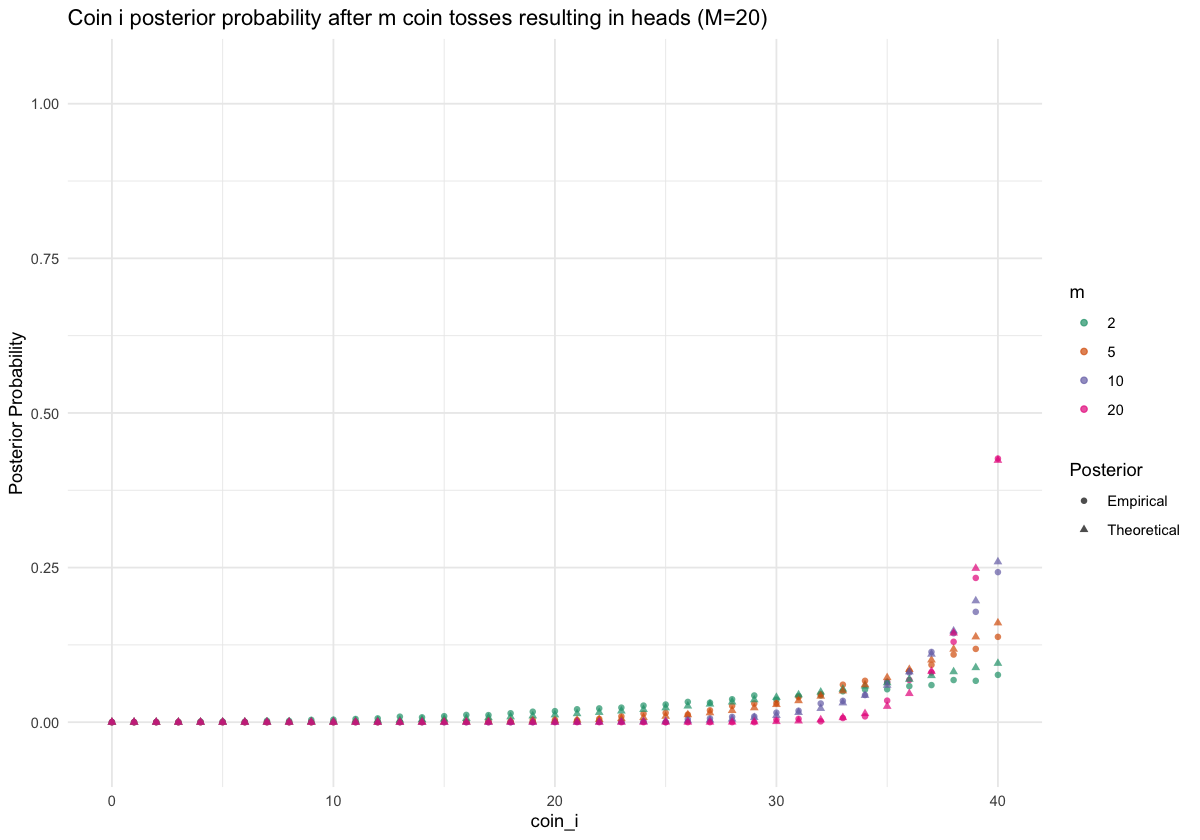

In [13]:
options(repr.plot.width=10,repr.plot.height=7)

for (M in c(10, 20, 30, 40)){
  dt <- record[record$M == M, -4]
  dt$Posterior <- "Empirical"
  
  dt2 <- record[record$M == M, -3]
  dt2$Posterior <- "Theoretical"
  
  colnames(dt)[3] <- colnames(dt2)[3] <- "Posterior Probability"
  dt <- rbind(dt,dt2)
  dt$m <- factor(dt$m)
  p <- ggplot(dt, aes(x=coin_i, y=`Posterior Probability`, color=m, shape=Posterior)) + 
    geom_point(alpha=0.7) + 
    theme_minimal() +  
    ylim(-0.05,1.05) + 
    ggtitle(paste0("Coin i posterior probability after m coin tosses resulting in heads (M=",m,")")) + 
    scale_color_brewer(palette = "Dark2")
  
  print(p)
}

<h1 style="color:blue">02 - A more elaborate mixture prior for the spinning coin</h1>

(continued from Diaconis experiment)

On reflection, it was decided that tails had come up more often than heads in the past; further some coins seemed likely to be symmetric. 

Thus, a final approximation to the prior was taken as:

$$
   0.50\cdot\betadist(10,20) + 0.20\cdot\betadist(15,15) + 0.30\cdot\betadist(20,10).
$$

Same observed data as in the previous model.

Perform a complete Bayesian analysis of this model, in close parallel to the first example.

(1) Using the theoretical formulas (prior predictive pmf, posterior pdf, posterior predictive pmf)

(2) Using a grid approximation

(3) Using independent random numbers (`rbeta()` functions, etc.)

(4) JAGS version

(5)${}^{\star}$ Stan version. 

In [38]:
# Number of trials
n<-10
# Observed x
x.obs<-3

# Model description

A plain Beta-Bernoulli model as in the Bayes' billiard problem. 

Learn about an unknown probability $\theta$ from an independent sequence of $n$ Bernoulli experiments $Y_{1},\dots,Y_{n}$ iid $\sim\operatorname{Bern}(\theta)$, where the value $1$ was observed $x$ times.

## Likelihood

$x\sim\binomdist(\text{size}=n,\text{prob}=\theta)$

## Prior distribution 
$\theta\sim0.50\cdot\betadist(10,20) + 0.20\cdot\betadist(15,15) + 0.30\cdot\betadist(20,10).$

In [39]:
#We describe the parameters of the mixture prior. Then, the pdf and cdf are calculated as mixtures of Betas

prior.alpha1<-10
prior.beta1<-20
prior.alpha2<-15
prior.beta2<-15
prior.alpha3<-20
prior.beta3<-10
prior.gamma1<-0.5
prior.gamma2<-0.2
prior.gamma3<-0.3

mixture.prior.pdf<-function(theta){
    return(prior.gamma1*dbeta(theta,prior.alpha1,prior.beta1)+prior.gamma2*dbeta(theta,prior.alpha2,prior.beta2)+prior.gamma3*dbeta(theta,prior.alpha3,prior.beta3))
}
mixture.prior.cdf<-function(theta){
    return(prior.gamma1*pbeta(theta,prior.alpha1,prior.beta1)+prior.gamma2*pbeta(theta,prior.alpha2,prior.beta2)+prior.gamma3*pbeta(theta,prior.alpha3,prior.beta3))
}

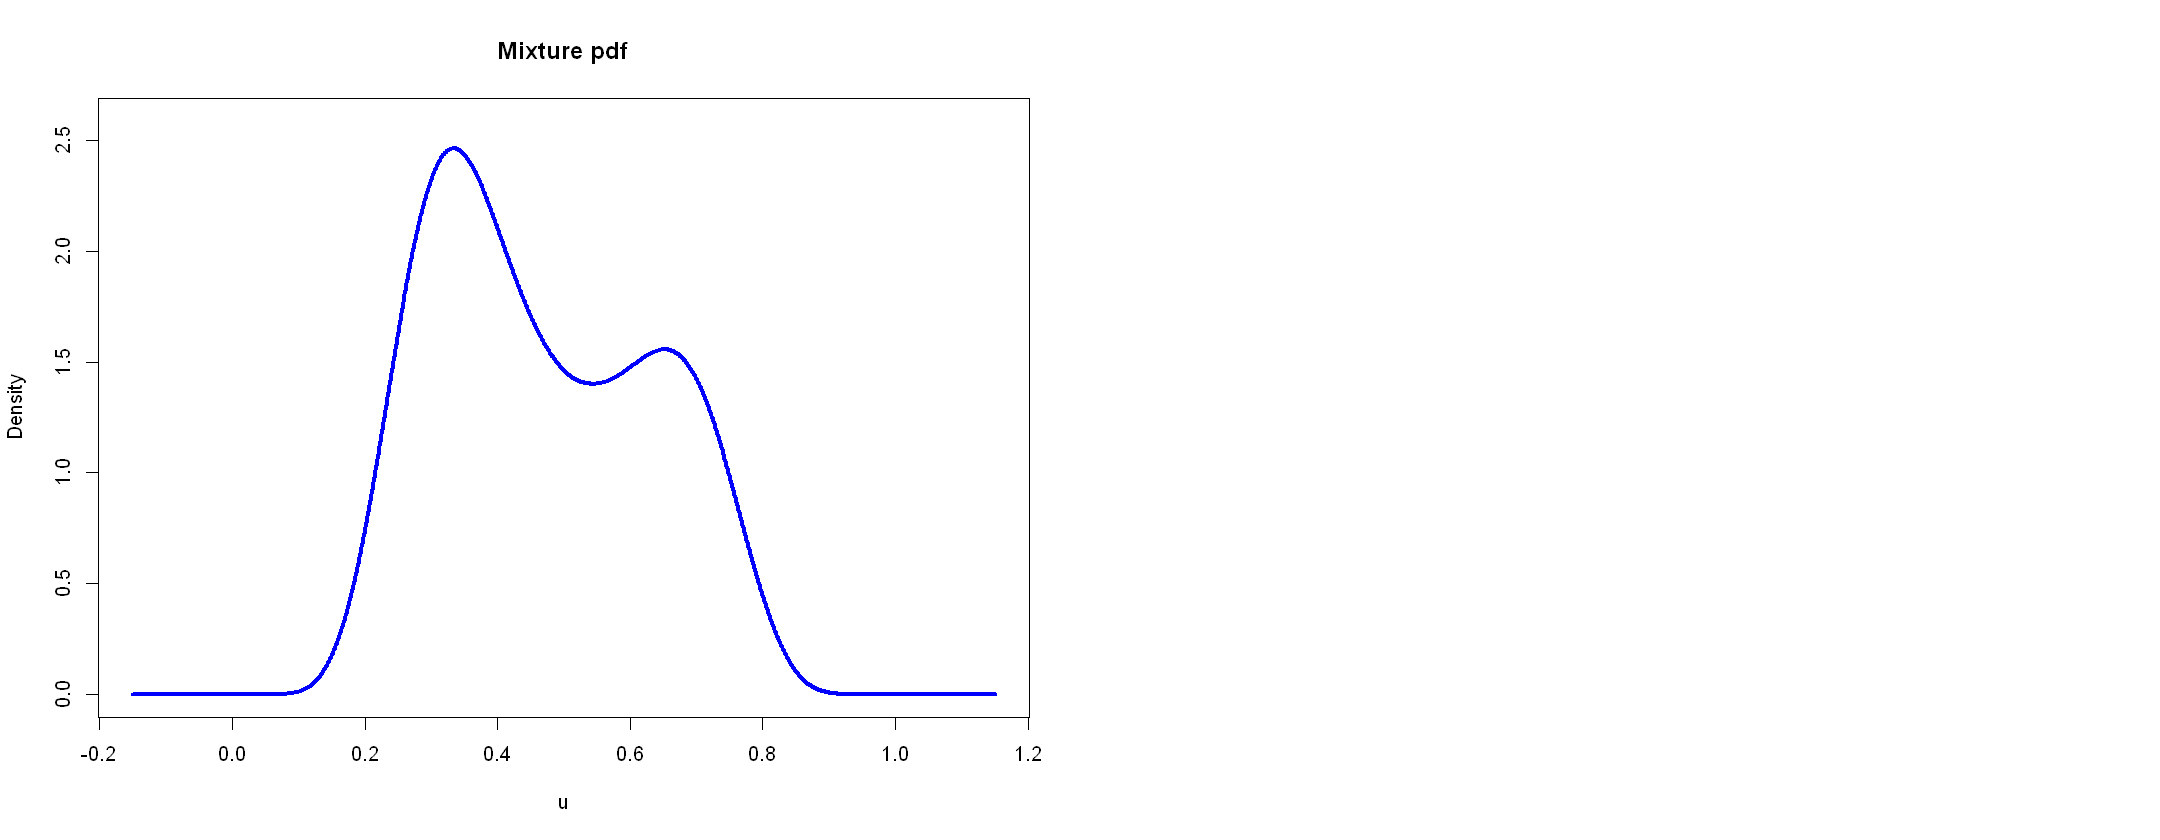

In [40]:
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
u<-seq(0,1,length=1000)
v<-mixture.prior.pdf(u)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Mixture pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

# 2.1. Bayesian analysis using the theoretical formulas

We assume the prior pdf is:

$$h(\theta)=\gamma_1h_1(\theta)+\gamma_2h_2(\theta)+\gamma_3h_3(\theta)$$

And the likelihood is  

$$f(x\mid \theta)= {{n}\choose{x}} \theta^{x}(1-\theta)^{n-x}$$

Then, the joint pdf is

$$f(x,\theta)=f(x\mid \theta)h(\theta)=
\gamma_1f_1(x, \theta)+
\gamma_2f_2(x, \theta)+
\gamma_3f_3(x, \theta)$$

where 
$$f_i(x, \theta)=f(x\mid \theta)h_i(\theta)$$

Integrating out $\theta$, we obtain the marginal for $x$:

$$f(x)=\int f(x,\theta)d\theta=\int \gamma_1f_1(x, \theta)+
\gamma_2f_2(x, \theta)+
\gamma_3f_3(x, \theta)d\theta=
$$
$$
=\gamma_1f_1(x)+\gamma_2f_2(x)+\gamma_3f_3(x)
$$

where 
$$f_i(x)=\int f(x\mid \theta)h_i(\theta)d\theta$$

Now, using Bayes' formula:
$$
h(\theta \mid x)=\dfrac{f(x,\theta)}{f(x)}=
\dfrac{\gamma_1f_1(x, \theta)+
\gamma_2f_2(x, \theta)+
\gamma_3f_3(x, \theta)}{\gamma_1f_1(x)+\gamma_2f_2(x)+\gamma_3f_3(x)}
$$

The posterior pdf can be rewritten as
$$
h(\theta \mid x)=
\dfrac{\gamma_1f_1(x)h_1(\theta \mid x)+
\gamma_2f_2(x)h_2(\theta \mid x)+
\gamma_3f_3(x)h_3(\theta \mid x)}{\gamma_1f_1(x)+\gamma_2f_2(x)+\gamma_3f_3(x)}
$$

where $$h_i(\theta \mid x)=\dfrac{f_i(x,\theta)}{f_i(x)}$$

In conclusion

$$
h(\theta \mid x)=
\hat{\gamma_1}h_1(\theta \mid x)+
\hat{\gamma_2}h_2(\theta \mid x)+
\hat{\gamma_3}h_3(\theta \mid x)
$$

Where $\hat{\gamma_i}=k\gamma_if_i(x)$, weighted so that the three constants keep adding to $1$.

Then, it is enough to obtain $f_i(x)$

$$h_i(\theta,\alpha,\beta)=\theta^{\alpha-1}(1-\theta)^{\beta-1}$$

$$f_i(x)=\int f(x\mid \theta)h_i(\theta)d\theta=
\int_0^1 \left({{n}\choose{x}} \theta^{x}(1-\theta)^{n-x}\right)
\left(\frac{1}{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}\right)d\theta=
$$
$$
={{n}\choose{x}}\frac{1}{B(\alpha,\beta)}\int_0^1 \theta^{\alpha+x-1}(1-\theta)^{\beta+n-x-1}d\theta=
{{n}\choose{x}}\frac{B(\alpha+x,\beta+n-x)}{B(\alpha,\beta)}\int_0^1 h_i(\theta,\alpha+x,\beta+n-x)d\theta=
{{n}\choose{x}}\frac{B(\alpha+x,\beta+n-x)}{B(\alpha,\beta)}
$$

And then,

$$
h_i(\theta \mid x)=\dfrac{f_i(x,\theta)}{f_i(x)}=\frac{B(\alpha,\beta)}{{{n}\choose{x}}B(\alpha+x,\beta+n-x)}
\frac{{{n}\choose{x}}}{B(\alpha,\beta)}\theta^{\alpha+x-1}(1-\theta)^{\beta+n-x-1}=h_i(\theta,\alpha+x,\beta+n-x)
$$

In [41]:
#We compute the new parameters of the Betas

post.alpha1<-prior.alpha1+x.obs
post.beta1<-prior.beta1+n-x.obs
post.alpha2<-prior.alpha2+x.obs
post.beta2<-prior.beta2+n-x.obs
post.alpha3<-prior.alpha3+x.obs
post.beta3<-prior.beta3+n-x.obs

#We compute the marginals for the given observation

f1<-choose(n,x.obs)*beta(post.alpha1,post.beta1)/beta(prior.alpha1,prior.beta1)
f2<-choose(n,x.obs)*beta(post.alpha2,post.beta2)/beta(prior.alpha2,prior.beta2)
f3<-choose(n,x.obs)*beta(post.alpha3,post.beta3)/beta(prior.alpha3,prior.beta3)

#We obtain the new gamma factors, imposing the weights add to 1
post.gamma1<-prior.gamma1*f1
post.gamma2<-prior.gamma2*f2
post.gamma3<-prior.gamma3*f3
sum<-post.gamma1+post.gamma2+post.gamma3
post.gamma1<-post.gamma1/sum
post.gamma2<-post.gamma2/sum
post.gamma3<-post.gamma3/sum

#The posterior is a new mixture

mixture.post.pdf<-function(theta){
    return(post.gamma1*dbeta(theta,post.alpha1,post.beta1)+post.gamma2*dbeta(theta,post.alpha2,post.beta2)+post.gamma3*dbeta(theta,post.alpha3,post.beta3))
}

mixture.post.cdf<-function(theta){
    return(post.gamma1*pbeta(theta,post.alpha1,post.beta1)+post.gamma2*pbeta(theta,post.alpha2,post.beta2)+post.gamma3*pbeta(theta,post.alpha3,post.beta3))
}

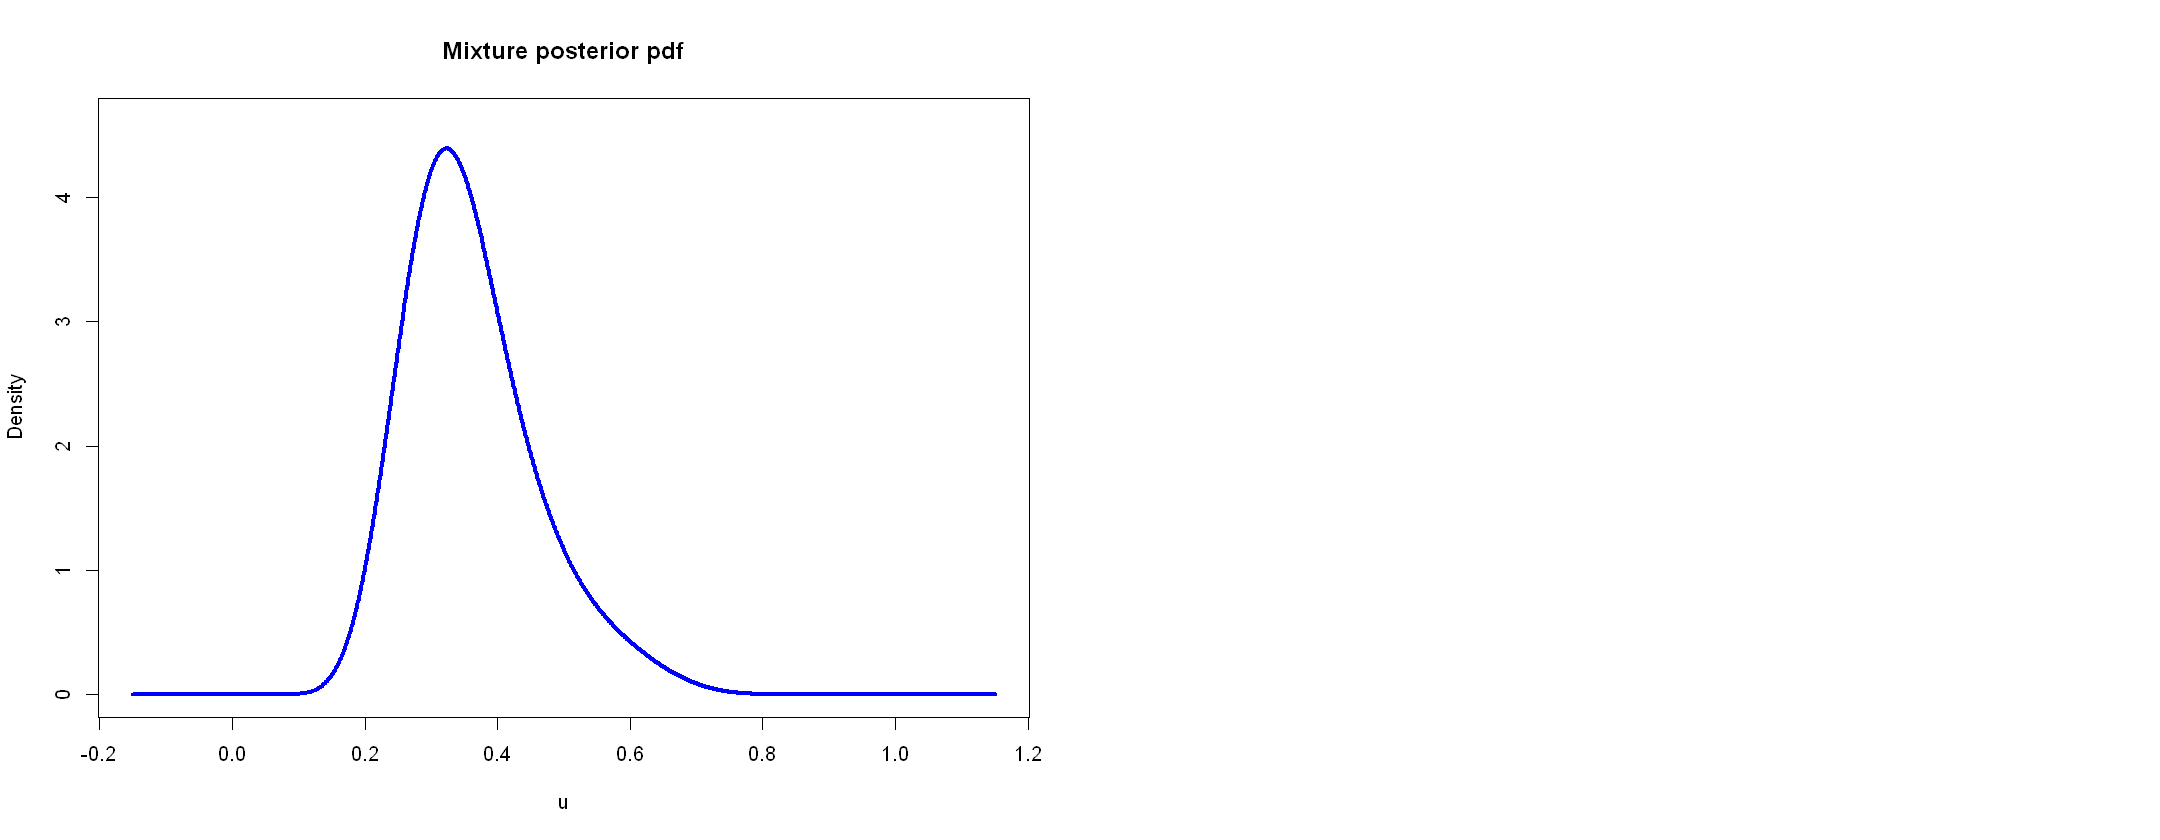

In [42]:
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
u<-seq(0,1,length=1000)
v<-mixture.post.pdf(u)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Mixture posterior pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

#### Analysis of posterior quantities

#### MAP estimator

The maximum of a mixture distribution cannot be calculated directly, so we look for the maximmu value on the pdf

[1] "Theoretical MAP: 0.323"


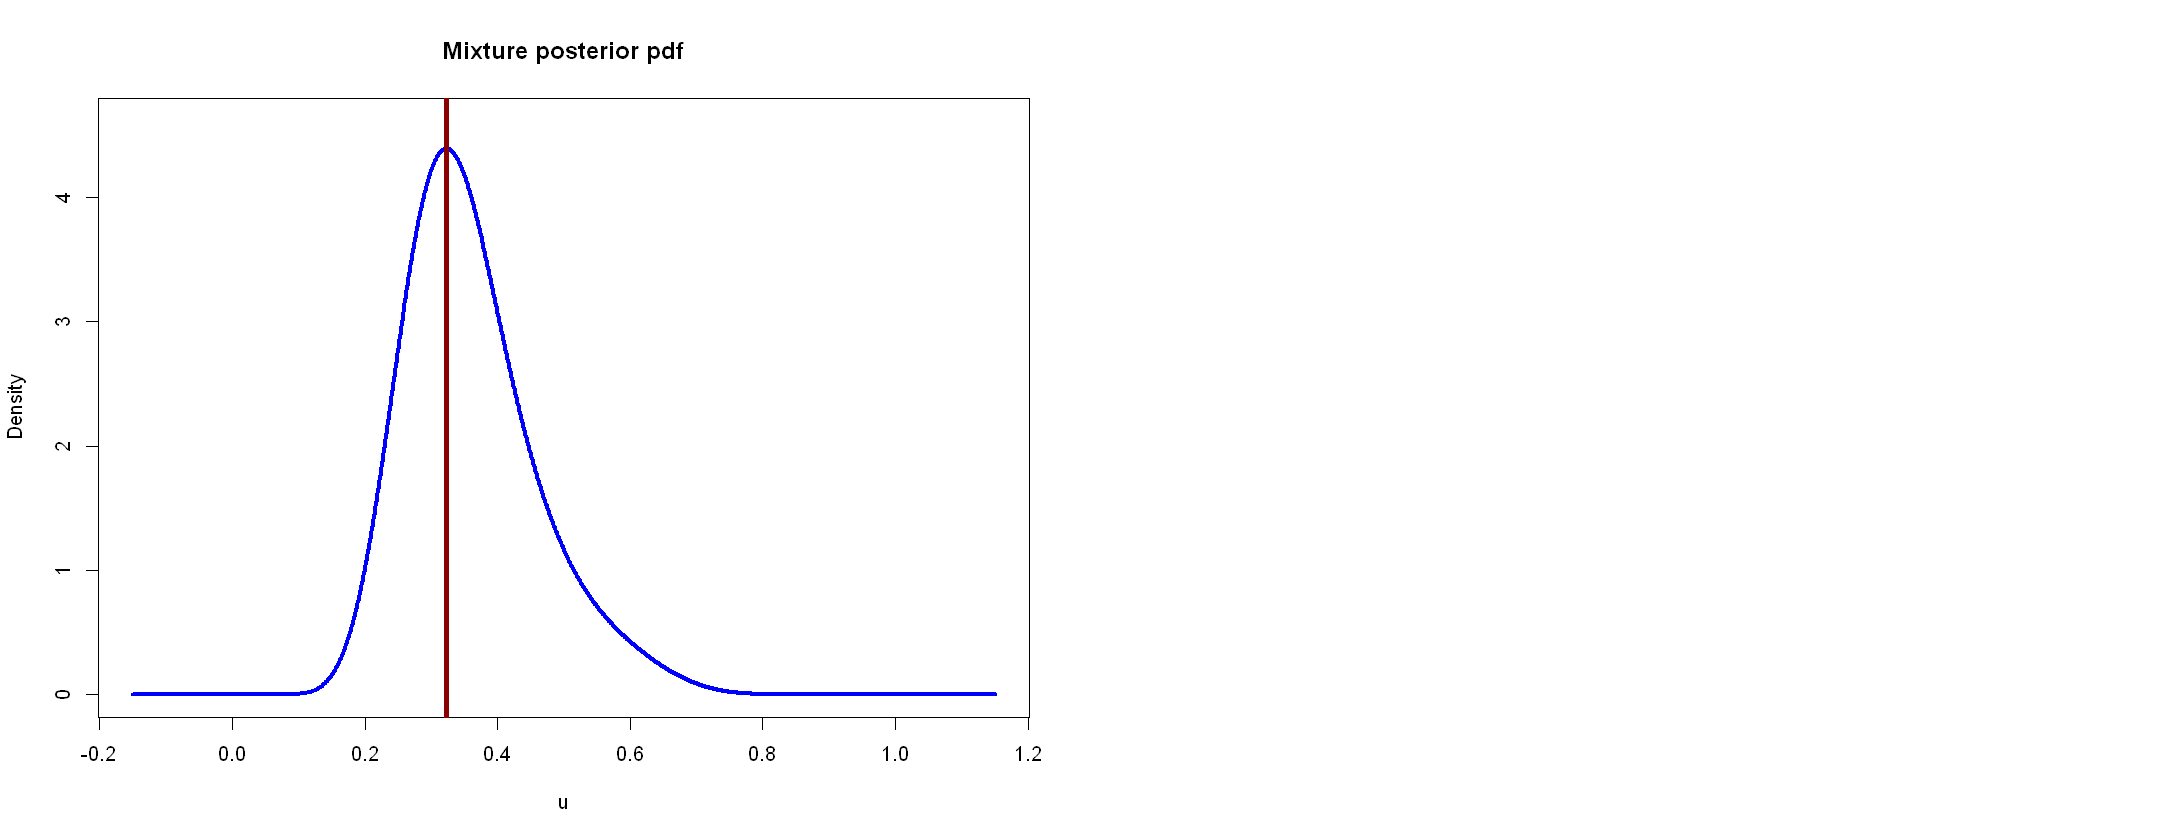

In [71]:
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
u<-seq(0,1,length=1000)
v<-mixture.post.pdf(u)

Theor.MAP<-u[which.max(v)]

plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Mixture posterior pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")

abline(v=Theor.MAP,col="DarkRed",lwd=4)

print(paste0("Theoretical MAP: ", round(Disc.MAP,3)))

#### Posterior expectation

For a generic $Z\sim\operatorname{Beta}(\alpha,\beta)$, the expectation is:

 
$$
    \mskip-600mu
    \operatorname{E}(Z)=\dfrac{\alpha}{\alpha+\beta}
$$

In our case, $Z\sim\gamma_1\operatorname{Beta}(\alpha_1,\beta_1)+\gamma_2\operatorname{Beta}(\alpha_2,\beta_2)+\gamma_3\operatorname{Beta}(\alpha_3,\beta_3)$

Then, 
$$
\operatorname{E}(Z)=\int \theta \left(\gamma_1\operatorname{Beta}(\alpha_1,\beta_1)+\gamma_2\operatorname{Beta}(\alpha_2,\beta_2)+\gamma_3\operatorname{Beta}(\alpha_3,\beta_3)\right) d\theta
$$
$$
\operatorname{E}(Z)=\sum \gamma_i \int \theta\operatorname{Beta}(\alpha_i,\beta_i)d\theta=\sum \gamma_i E(\operatorname{Beta}(\alpha_i,\beta_i))
$$

In [21]:
# Theoretical Expectation
Theor.Post.Expectation1<-(post.alpha1)/(post.alpha1+post.beta1)
Theor.Post.Expectation2<-(post.alpha2)/(post.alpha2+post.beta2)
Theor.Post.Expectation3<-(post.alpha3)/(post.alpha3+post.beta3)
Theor.Post.Expectation<-post.gamma1*Theor.Post.Expectation1+
    post.gamma2*Theor.Post.Expectation2+
    post.gamma3*Theor.Post.Expectation3

print(paste0("Theoretical Posterior expectation: ",round(Theor.Post.Expectation,3)))

[1] "Theoretical Posterior expectation: 0.36"


#### Posterior Variance

For a generic $Z\sim\operatorname{Beta}(\alpha,\beta)$, the variance is:

$$
    \mskip-600mu
    \operatorname{var}(Z)=
    \dfrac{\alpha\,\beta}{(\alpha+\beta)^2\,(\alpha+\beta+1)}.
$$

In our case, $Z\sim\gamma_1\operatorname{Beta}(\alpha_1,\beta_1)+\gamma_2\operatorname{Beta}(\alpha_2,\beta_2)+\gamma_3\operatorname{Beta}(\alpha_3,\beta_3)$

We call the expectation $\theta^*$, and $\theta_i^*$ the expectations of $\operatorname{Beta}(\alpha_i,\beta_i)$

Then, 

$$
\operatorname{var}(Z)= \int (\theta-\theta^*)^2\sum\gamma_i\operatorname{Beta}(\alpha_i,\beta_i)d\theta =
\int \sum (\theta-\theta_i^*+\theta_i^*-\theta^*)^2\gamma_i\operatorname{Beta}(\alpha_i,\beta_i)d\theta =
$$

$$
=\int \sum((\theta-\theta_i^*)^2+(\theta_i^*-\theta^*)^{2}+2(\theta-\theta_i^*)(\theta_i^*-\theta^*))\gamma_i\operatorname{Beta}(\alpha_i,\beta_i)d\theta =
$$

$$
=\sum\gamma_i\int (\theta-\theta_i^*)^2\operatorname{Beta}(\alpha_i,\beta_i)d\theta +
\sum\gamma_i(\theta_i^*-\theta^*)^{2}\int \operatorname{Beta}(\alpha_i,\beta_i)d\theta +2
\sum\gamma_i(\theta_i^*-\theta^*)\int (\theta-\theta_i^*)\operatorname{Beta}(\alpha_i,\beta_i)d\theta=
$$

$$
=\sum\gamma_i\operatorname{var}(\operatorname{Beta}(\alpha_i,\beta_i)) +
\sum\gamma_i(\theta_i^*-\theta^*)^{2} +2
\sum\gamma_i(\theta_i^*-\theta^*)(\operatorname{E}(\operatorname{Beta}(\alpha_i,\beta_i))-\theta_i^*)=
$$

$$
=\sum\gamma_i\operatorname{var}(\operatorname{Beta}(\alpha_i,\beta_i)) +
\sum\gamma_i(\theta_i^*-\theta^*)^{2}
$$


In [26]:
# Theoretical Expectation
Theor.Post.Variance1<-(post.alpha1*post.beta1)/((post.alpha1+post.beta1)^2*(post.alpha1+post.beta1+1))
Theor.Post.Variance2<-(post.alpha2*post.beta2)/((post.alpha2+post.beta2)^2*(post.alpha2+post.beta2+1))
Theor.Post.Variance3<-(post.alpha3*post.beta3)/((post.alpha3+post.beta3)^2*(post.alpha3+post.beta3+1))

Theor.Post.Variance<-post.gamma1*Theor.Post.Variance1+
    post.gamma2*Theor.Post.Variance2+
    post.gamma3*Theor.Post.Variance3+
        post.gamma1*(Theor.Post.Expectation1-Theor.Post.Expectation)^2+
        post.gamma2*(Theor.Post.Expectation2-Theor.Post.Expectation)^2+
        post.gamma3*(Theor.Post.Expectation3-Theor.Post.Expectation)^2


print(paste0("Theoretical Posterior variance: ",round(Theor.Post.Variance,3)))

[1] "Theoretical Posterior variance: 0.01"


# 2.2. Bayesian analysis using a grid approximation

#### Discretizing the prior

Given the prior pdf $p(\theta)$, $\theta\in(0,1)$.

Cut the support interval $(0,1)$ in $N$ intervals. 

Build a discrete r.v. with the $N$ values $1/N,\dots,N/N$ and probabilities:

$$
    \prob\big(\dfrac{i}{N}\big)=\prob\big\{\theta\in\big(\dfrac{i-1}{N},\dfrac{i}{N}\big)\big\},\mskip40mu1\leq i\leq N.
$$

In [73]:
#Create a grid with N intervals
N<-1000
grid<-seq(0,1,by=1/N)
theta<-grid[-1] 

#Obtain the cdf at the grid points, then assign at each interval its probability
p.prior<-mixture.prior.cdf(grid)
d.prior<-diff(p.prior)
length(d.prior)
sum(d.prior)

[1] 1000

[1] 1

#### Plot of prior pdf and discretized prior pdf

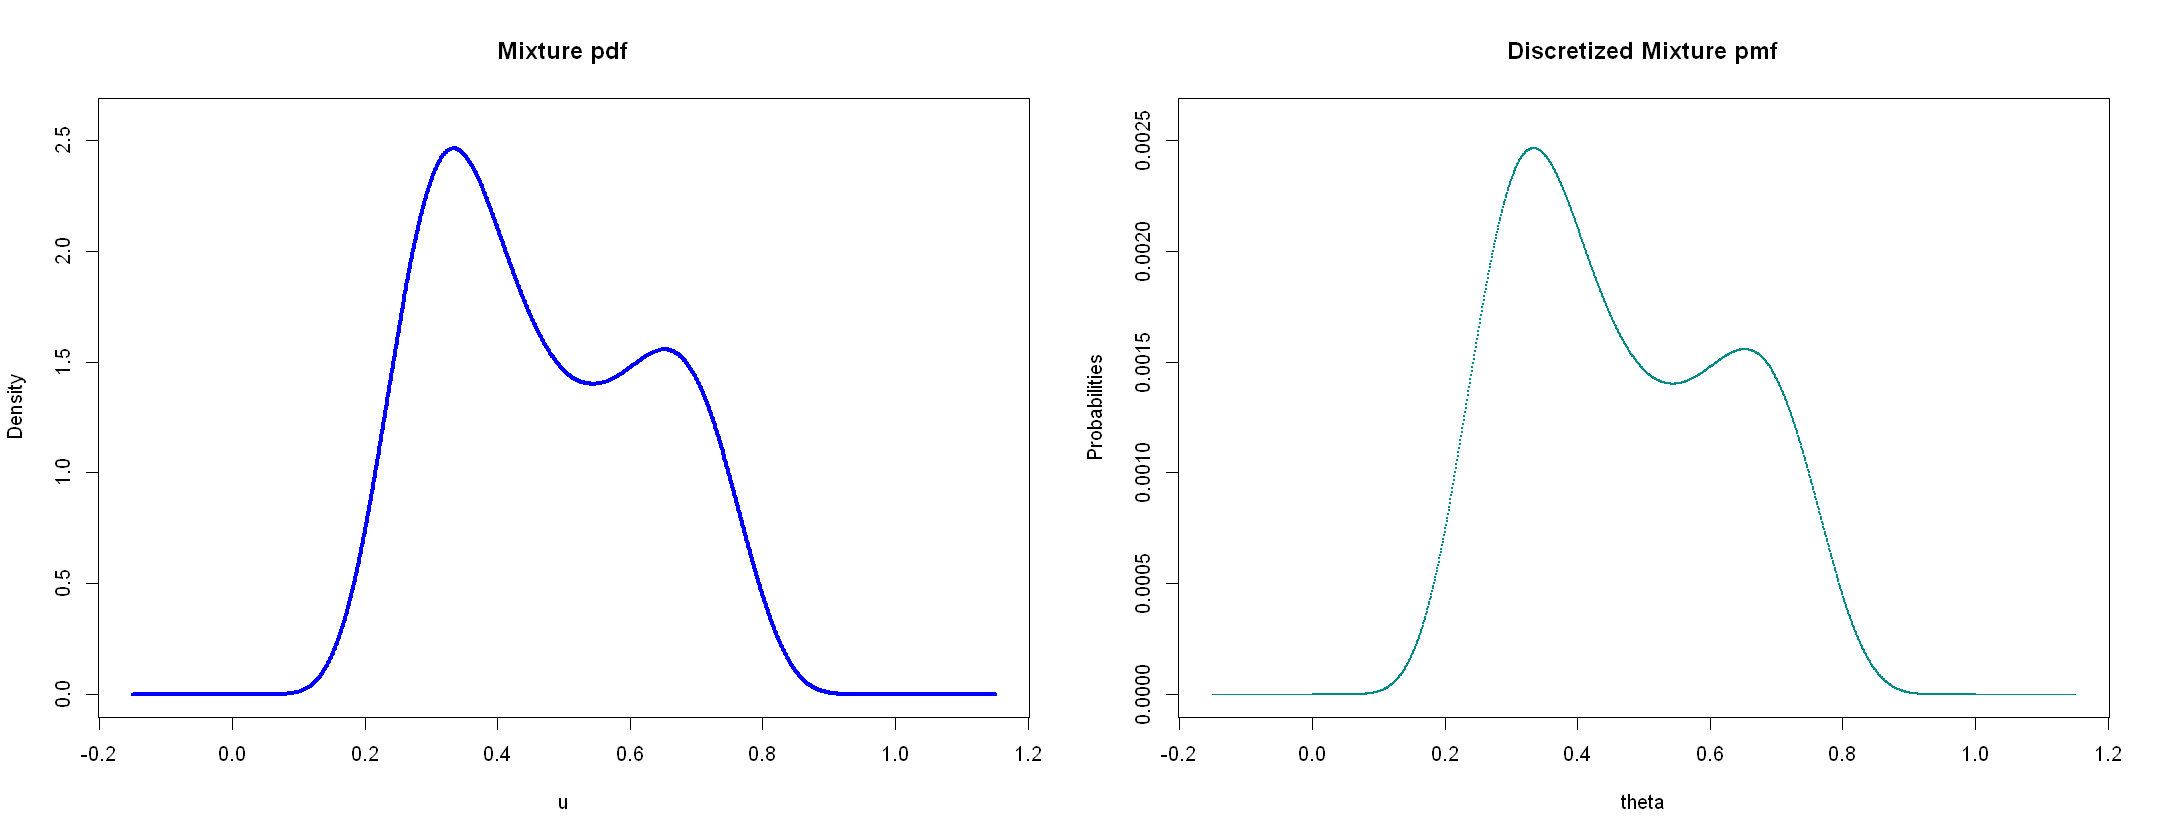

In [74]:
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
#Plot the pdf
u<-seq(0,1,length=1000)
v<-mixture.prior.pdf(u)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Mixture pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")
#Plot the discretized pmf
plot(theta,d.prior,ylim=c(0,max(d.prior)*1.05),xlim=c(-0.15,1.15),
     ylab="Probabilities",type="p",col="DarkCyan",pch=19,cex=0.1,
     main=sprintf("Discretized Mixture pmf"))
lines(c(-0.15,0),c(0,0),lwd=1,col="DarkCyan")
lines(c(1,1.15),c(0,0),lwd=1,col="DarkCyan")

The posterior pmf $p(\theta\,|\,x)$ is obtained from Bayes' formula for pmf's:

$$
    p(\theta\CondTo x)=\dfrac{p(x\,,\,\theta)}{p(x)}=
    \dfrac{p(x\CondTo\theta)\cdot p(\theta)}{p(x)}.
$$

We need only compute the numerator, the product of:

$$
    \big(\text{Likelihood at grid values}\big)\times\big(\text{Prior probabilities at grid values}\big).
$$

Then the posterior pmf is obtained by imposing that the sum of its values must be 1. 

At this stage $x=x.obs$, the observed datum.

In [75]:
Lik<-dbinom(x.obs,size=n,prob=theta)
Joint<-Lik*d.prior
Normalizing.constant<-sum(Joint)
d.post<-Joint/Normalizing.constant

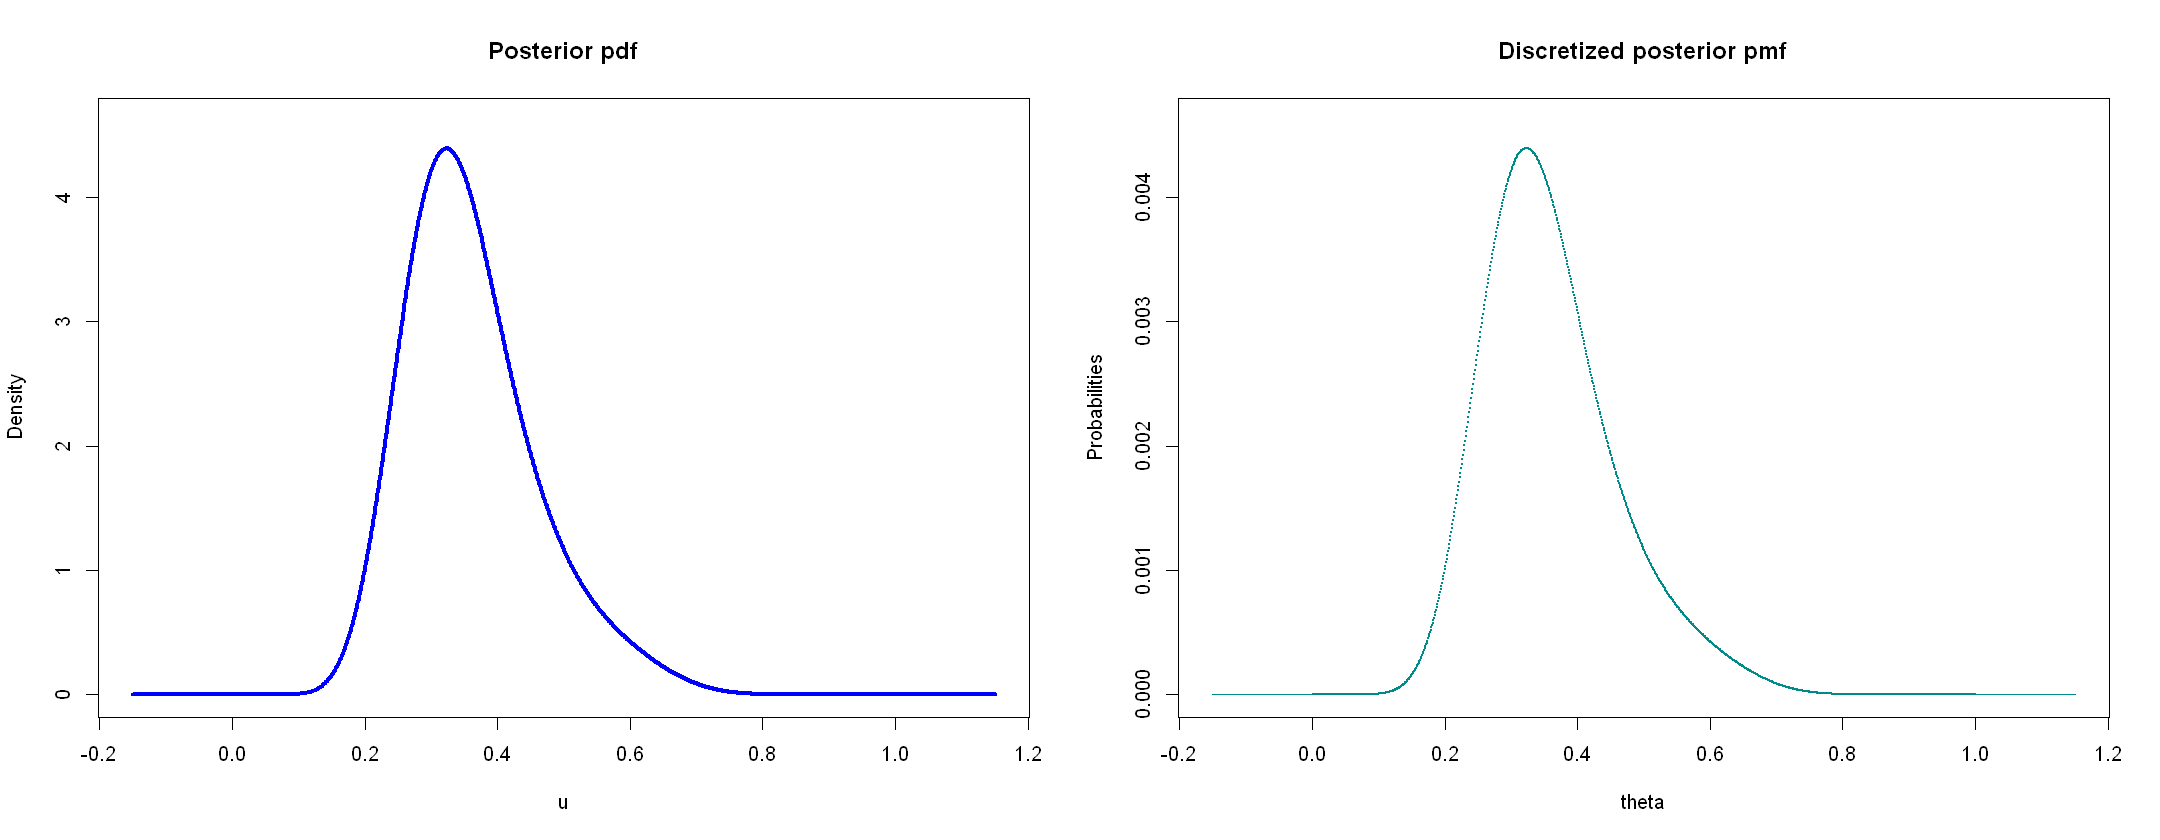

In [76]:
options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
#Plot the posterior pdf
u<-seq(0,1,length=1000)
v<-mixture.post.pdf(u)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Posterior pdf"))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")
#Plot the discretized posteriorpmf
plot(theta,d.post,ylim=c(0,max(d.post)*1.05),xlim=c(-0.15,1.15),
     ylab="Probabilities",type="p",col="DarkCyan",pch=19,cex=0.1,main="Discretized posterior pmf")
lines(c(-0.15,0),c(0,0),lwd=1,col="DarkCyan")
lines(c(1,1.15),c(0,0),lwd=1,col="DarkCyan")

#### Analysis of posterior quantities

#### MAP estimator

[1] "Discretized MAP: 0.323"


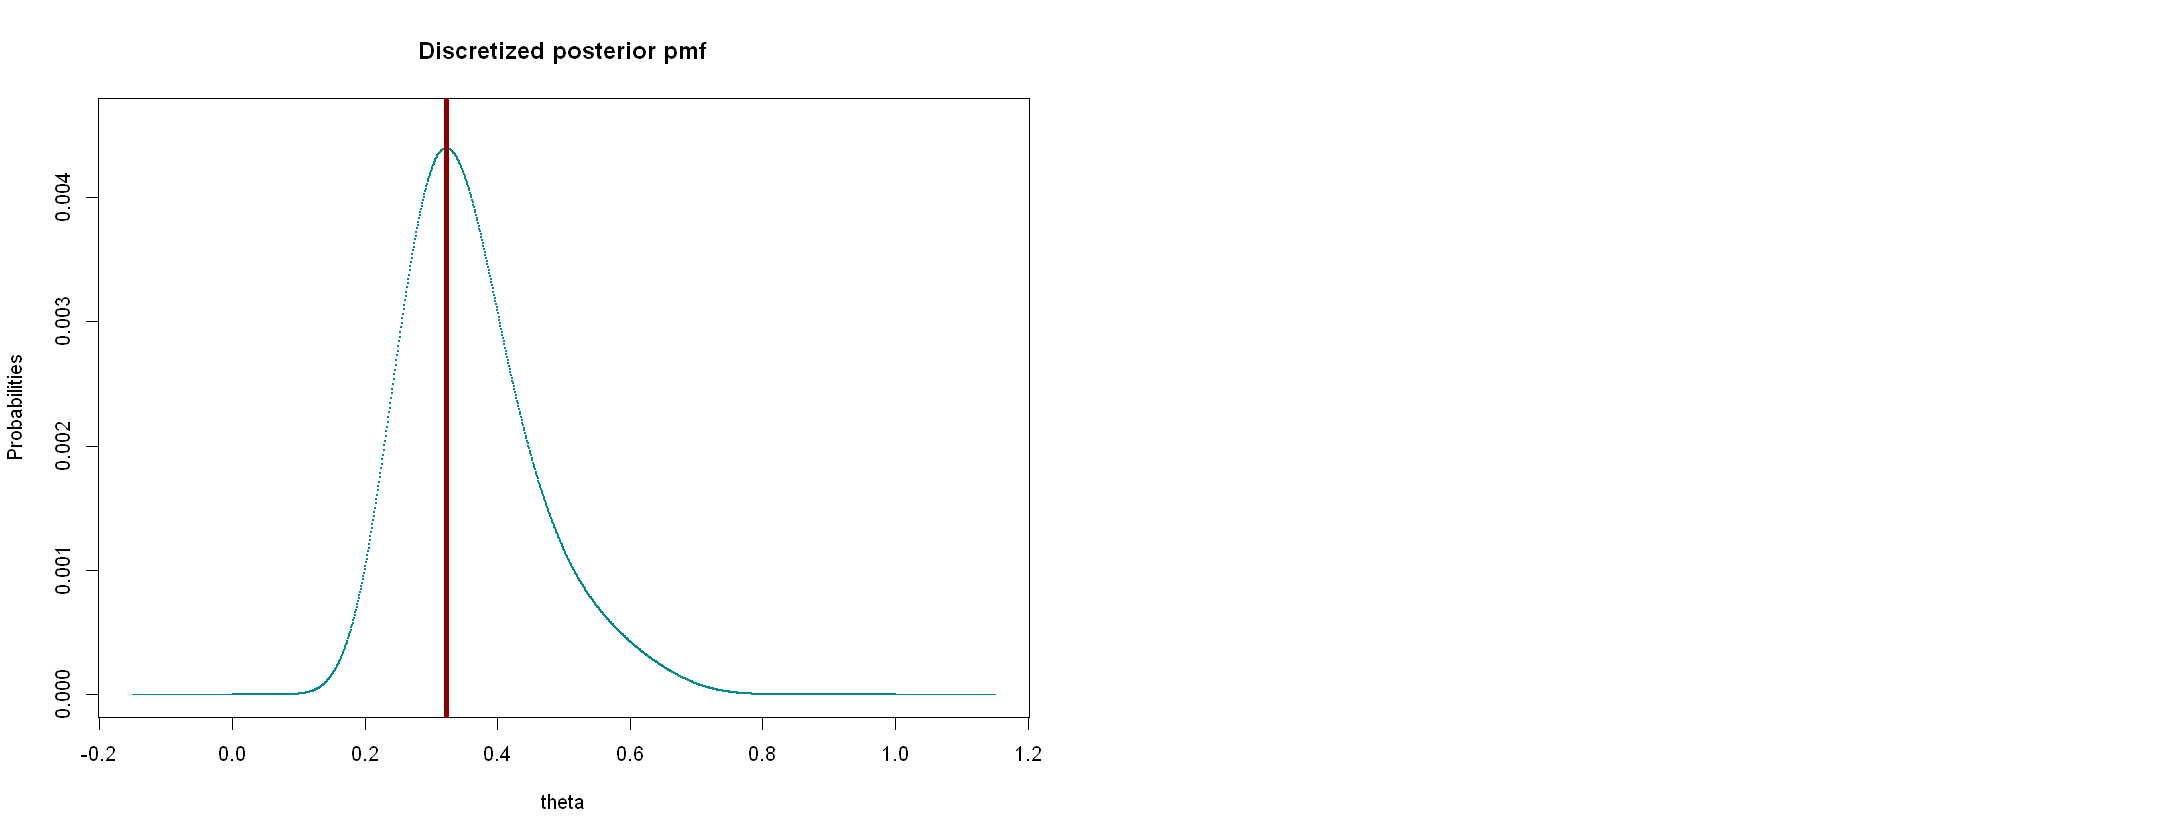

In [77]:
# Finding the maximum a posteriori (MAP)
Disc.MAP<-theta[which.max(d.post)]

options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))

plot(theta,d.post,ylim=c(0,max(d.post)*1.05),xlim=c(-0.15,1.15),
     ylab="Probabilities",type="p",col="DarkCyan",pch=19,cex=0.1,main="Discretized posterior pmf")
lines(c(-0.15,0),c(0,0),lwd=1,col="DarkCyan")
lines(c(1,1.15),c(0,0),lwd=1,col="DarkCyan")

abline(v=Disc.MAP,col="DarkRed",lwd=4)

print(paste0("Discretized MAP: ", round(Disc.MAP,3)))

#### Posterior expectation

In [78]:
# Discretized Expectation
Disc.Post.Expectation<-sum(theta*d.post)

print(paste0("Discretized Posterior expectation: ",round(Disc.Post.Expectation,3)))

[1] "Discretized Posterior expectation: 0.361"


#### Posterior variance

In [79]:
# Discretized Variance
Disc.Post.Variance<-sum((theta-Disc.Post.Expectation)^2*d.post)

print(paste0("Discretized Posterior variance: ",round(Disc.Post.Variance,3)))

[1] "Discretized Posterior variance: 0.01"


#### A quantile function for the posterior distribution

In [80]:
#We look for the first point where the cumulative sum is at least 0,0.25,0.5,0.75,1

p.post<-c(0,cumsum(d.post))   # append a 0 at the beginning 
p.post[N+1]<-1                # avoiding the rounding error
theta0<-c(0,theta)
q.post<-function(t){theta0[min(which(p.post>=t))]}
Vq.post<-Vectorize(q.post)
Disc.Post.Quartiles<-Vq.post(c(0,0.25,0.50,0.75,1)) 

# Simulated Quantiles
print("Discretized posterior quantiles:")
round(Disc.Post.Quartiles,4)

[1] "Discretized posterior quantiles:"


[1] 0.000 0.288 0.346 0.418 0.968

#### 90% credible interval for theta

[1] 0.0035

Credible interval (90.00 %): (0.1980, 0.5220)

[1] 0.324

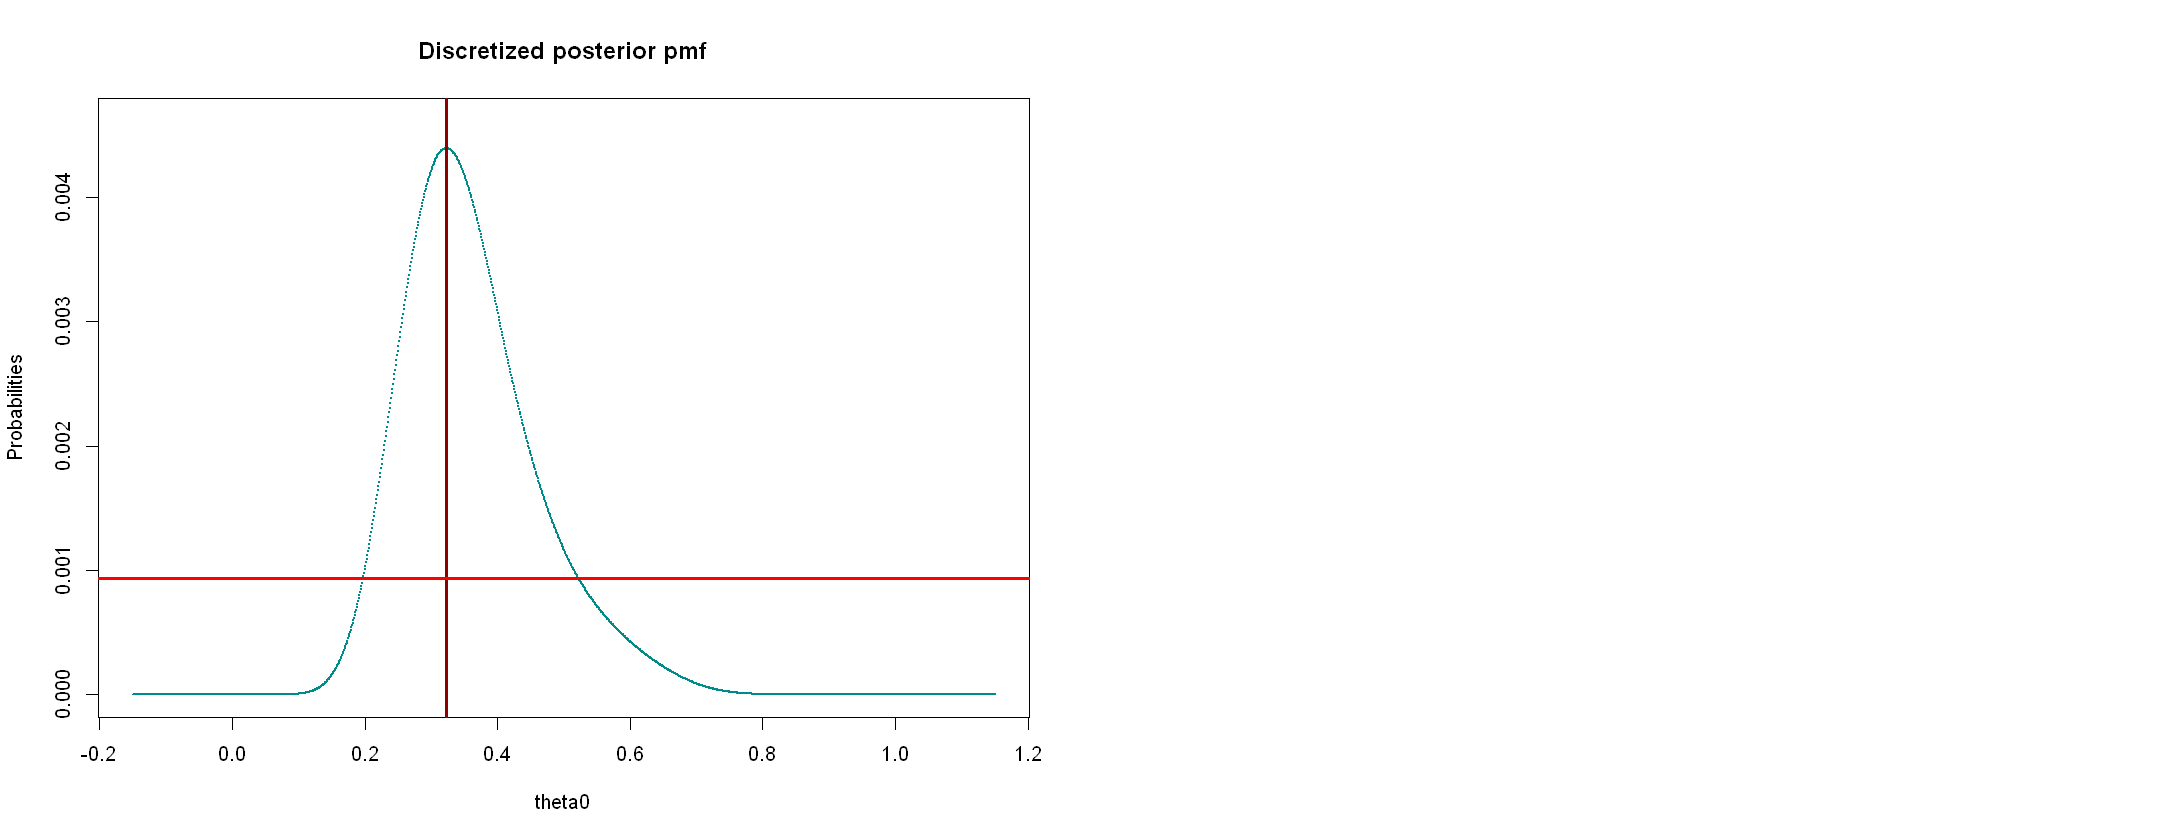

In [81]:
#We create a function that computes the probability in the interval described by the line at distance s

d.post0<-c(0,d.post)  # to have same length as theta0 and p.post
y.max<-max(d.post0)
p.post.fun<-function(x){return(p.post[min(which(theta0>=x))])}
Vp.post.fun<-Vectorize(p.post.fun)

CI.theta<-function(s){
    idxs<-which(d.post0>=(y.max-s))
    return(theta0[c(min(idxs),max(idxs))])
    }
gamma<-0.90
Disc.gamma.3<-function(s){
    CI.thetas<-CI.theta(s)
    return(diff(Vp.post.fun(CI.thetas))-gamma)
    }

#We look for an s such that the probability is 90%
G.s<-uniroot(Disc.gamma.3,c(0,y.max))
Disc.s<-G.s$root
round(Disc.s,4)

#We plot the interval
Credible.Interval.03<-CI.theta(Disc.s)
cat(sprintf("Credible interval (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval.03[1],4),round(Credible.Interval.03[2],4)))

width.03<-diff(Credible.Interval.03)
round(width.03,4)

options(repr.plot.width=18,repr.plot.height=7)
par(mfrow=c(1,2))
plot(theta0,d.post0,ylim=c(0,y.max*1.05),xlim=c(-0.15,1.15),
     ylab="Probabilities",type="p",col="DarkCyan",pch=19,cex=0.1,main="Discretized posterior pmf")
lines(c(-0.15,0),c(0,0),lwd=2,col="DarkCyan")
lines(c(1,1.15),c(0,0),lwd=2,col="DarkCyan")
legx<-ifelse(x.obs/n<0.5,x.obs/n+0.1,x.obs/n-0.1)
abline(v=Disc.MAP,col="DarkRed",lwd=3)
text(legx,0.5,"MAP",col="DarkRed",cex=1.8)
abline(h=y.max-Disc.s,lwd=2.5,col="red")

# 2.3. Using independent random numbers

Here we solve the same problem by simulating using r random generation functions (rbinom...).

First, we define the problem:

In [1]:
sample_size <- 20000 # Number of experiments we will perform
n_throws <- 10 # Number of times each coin is flipped
m_heads <- 3 # Number of heads obtained

Next, we generate 20,000 theta values by sampling from the defined distribution.
First, we will randomly define from which of the three beta distributions each coin comes from, giving to each distribution the corresponding probability. Second, we will use rbeta to generate the corresponding theta value from the corresponding distribution for each coin. The distribution of the generated thetas is shown in the histogram below.

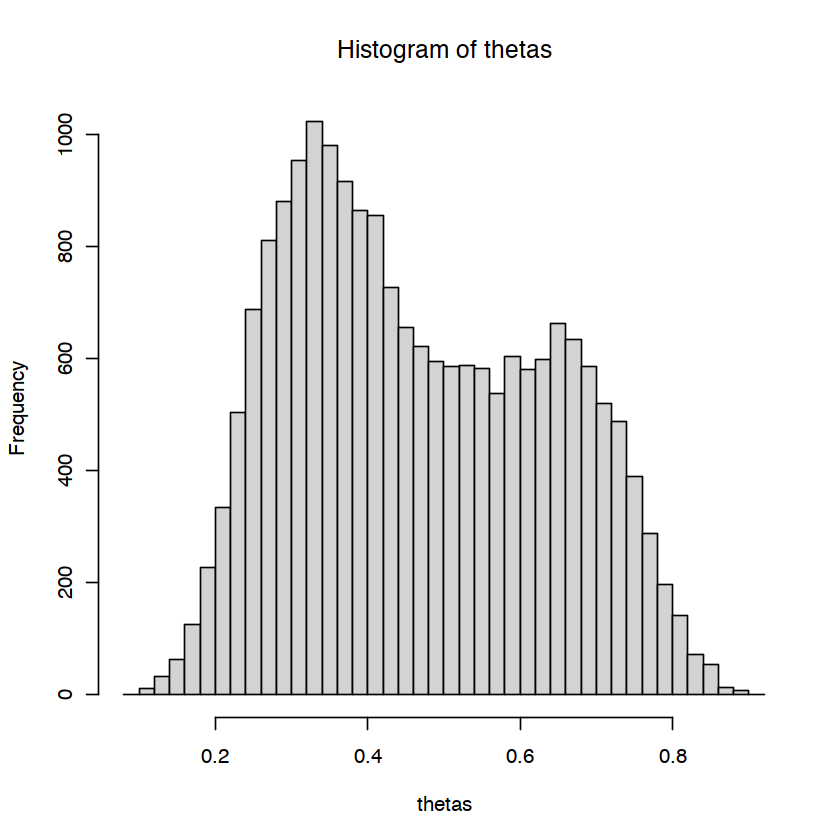

In [2]:
# Assign from which theta distribution we will pick each coin
source_beta <- sample(c(1,2,3), replace = TRUE, size = sample_size, prob=c(0.5, 0.2, 0.3))

# Generate thetas values picking coins from the corresponding beta distribution
thetas <- c(rbeta(sample_size,10,20)[source_beta == 1], 
            rbeta(sample_size,15,15)[source_beta == 2], 
            rbeta(sample_size,20,10)[source_beta == 3])

# Simulated prior
hist(thetas, breaks=50)

Next, we flip each coin m times by randomly generating values from a binomial distribution, taking as probability the theta value assigned to each coin. Below, we show the frequency of the different number of heads we have obtained and the prior predictive probability mass function for our simulation.

[1] "Absolute frequency of m heads:"


heads
   0    1    2    3    4    5    6    7    8    9   10 
 317 1190 2267 2872 3213 2970 2671 2125 1456  725  194 

[1] "Relative frequency of m heads:"


heads
      0       1       2       3       4       5       6       7       8       9 
0.01585 0.05950 0.11335 0.14360 0.16065 0.14850 0.13355 0.10625 0.07280 0.03625 
     10 
0.00970 

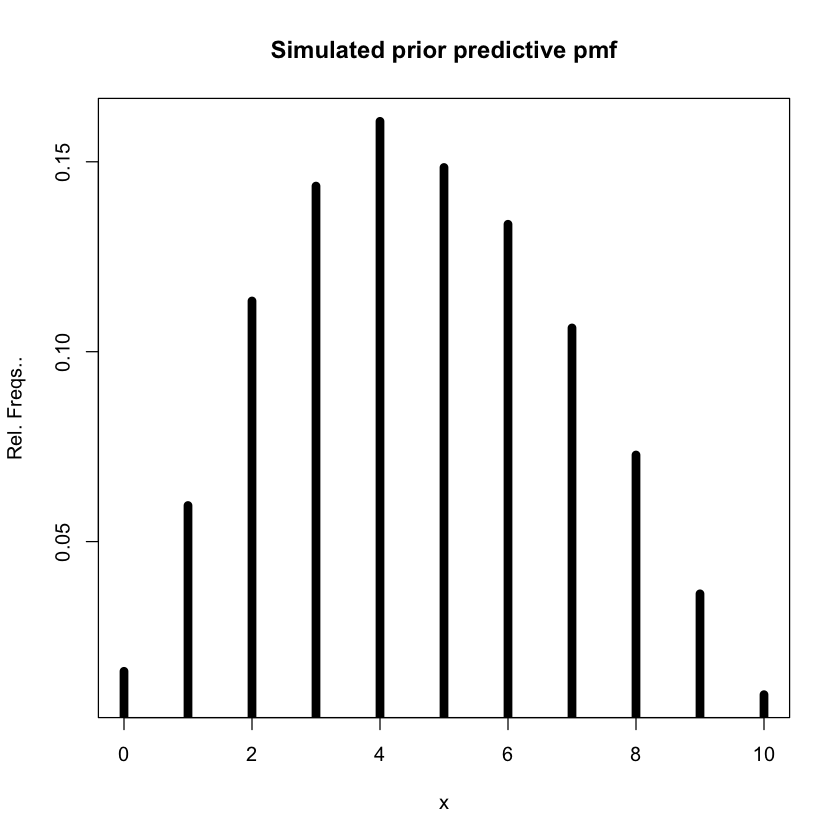

In [6]:
# Number of heads in m trials
heads <- rbinom(n = sample_size, size = n_throws, prob = thetas)

# Absolute frequencies
print("Absolute frequency of m heads:")
table(heads)
# Relative frequencies. 
# The relative frequency of 3 heads is the X-marginal for X=m=3.
# Obtaining m=3 heads is not the most likely outcome, based on this prior
print("Relative frequency of m heads:")
f <- table(heads)/sum(table(heads))
f
matplot(x=names(f),y=f,type="h",lwd=7, lty=1,
        xlab="x",ylab="Rel. Freqs..",
        main="Simulated prior predictive pmf")

Finally, to study the posterior probability of having m=3 heads given theta, we pick all cases resulting in m=3 heads.

[1] "Proportion of samples with m=3 heads: 0.1436"


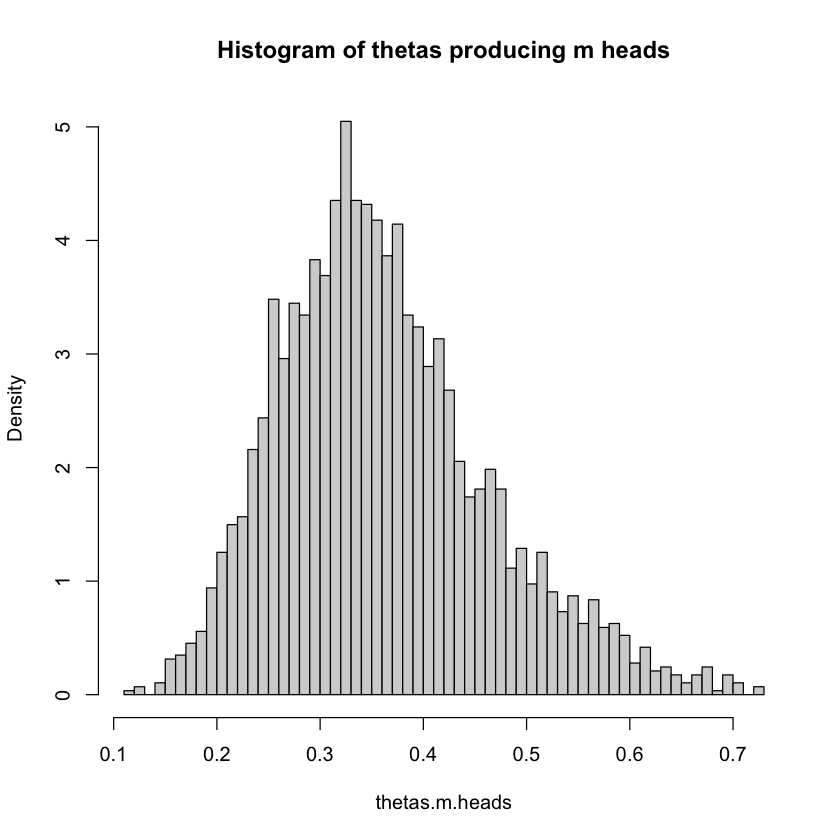

In [7]:
# Cases in which we get m=3 heads
m.heads.idx <- heads == m_heads

# Proportion of cases in which we get m=3 heads
print(paste0("Proportion of samples with m=3 heads: ", sum(m.heads.idx)/length(m.heads.idx)))

# Thetas that have generated m=3 heads
thetas.m.heads <- thetas[m.heads.idx]

# The histogram shows the theta values generating m=3 heads
hist(thetas.m.heads, breaks=50, freq=FALSE, main = "Histogram of thetas producing m heads")

#### Analysis of posterior quantities

The maximum a posteriori (MAP) can be estimated from our simulation as the theta value with maximal density.

In [3]:
# Finding the maximum a posteriori (MAP)
# Finding MAP
thetas.m.heads.density <-density(thetas.m.heads)
Sim.MAP <- thetas.m.heads.density$x[which.max(thetas.m.heads.density$y)]

# Plot over histogram
hist(thetas.m.heads, breaks=50, freq=FALSE, main="Histogram of thetas producing m=3 heads")
abline(v=Sim.MAP,col="DarkRed",lwd=4)
lines(thetas.m.heads.density$x,thetas.m.heads.density$y,lwd=2.5,col="DarkGreen")
text(0.42, 0.5, "Simulated MAP", col="DarkRed")
print(paste0("Simulated MAP: ", round(Sim.MAP,3)))

ERROR: Error in density(thetas.m.heads): objeto 'thetas.m.heads' no encontrado


Below, we calculate the posterior expectation, variance and quantiles based on this simulation.

In [9]:
# Simulated Expectation 
print(paste0("Simulation based posterior expectation: ",round(mean(thetas.m.heads),3)))

# Simulated Variance
print(paste0("Simulation based posterior variance: ",round(var(thetas.m.heads),3)))


# Simulated Quantiles
print("Simulation based posterior quantiles: ")
quantiles <- quantile(thetas.m.heads,c(0,0.25,0.50,0.75,1))
round(quantiles,4)

[1] "Simulation based posterior expectation: 0.362"
[1] "Simulation based posterior variance: 0.01"
[1] "Simulation based posterior quantiles: "


0%    25%    50%    75%   100% 
0.1129 0.2901 0.3487 0.4183 0.7249

Finally, we determine the credible interval of theta by intersecting the empirical pdf with a horizontal line.

In [11]:
y.max<-max(thetas.m.heads.density$y)
gamma <- 0.9

Sim.gamma <-function(s){
    CI.thetas<-(thetas.m.heads.density$x)[which(thetas.m.heads.density$y>=(y.max-s))]
    return(sum((min(CI.thetas)<=thetas.m.heads)&(thetas.m.heads<=max(CI.thetas)))/length(thetas.m.heads)-gamma)
}

G.s <- uniroot(Sim.gamma,c(0,y.max))
Sim.s<-G.s$root

CI.thetas<-(thetas.m.heads.density$x)[which(thetas.m.heads.density$y>=(y.max-Sim.s))]
Credible.Interval <-c(min(CI.thetas),max(CI.thetas))
cat(sprintf("Credible interval 03 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval[1],4),round(Credible.Interval[2],4)))
width <-diff(Credible.Interval)
print(paste("CI width:",round(width,4)))

Credible interval 03 (90.00 %): (0.1965, 0.5249)[1] "CI width: 0.3284"


# 2.4. Bayesian analysis using JAGS

In [4]:
# Load JAGS
require(R2jags)

Loading required package: R2jags

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘R2jags’”


In [60]:
# List of parameters of our model, loaded before.
Mix.01.dat<-list(a1=prior.alpha1,b1=prior.beta1,a2=prior.alpha2,b2=prior.beta2,b3=prior.beta3,a3=prior.alpha3
                 ,gamma1=prior.gamma1,gamma2=prior.gamma2,gamma3=prior.gamma3,n=n,x=x.obs)

In [61]:
# JAGS model architecture
cat(
"model
    {
    x~dbin(p,n)            
    p<-theta[r]
    r~dcat(g[])
    theta[1]~dbeta(a1,b1) 
    theta[2]~dbeta(a2,b2)
    theta[3]~dbeta(a3,b3)
    g[1]<-gamma1
    g[2]<-gamma2
    g[3]<-gamma3
    }"
    ,file="Mix.01.jag")

In [62]:
# We chose 4 chains, 3500 iterations and we discard the first 500.
Mix.01.m1<-jags(data=Mix.01.dat, n.chains=4,n.iter=3500,n.burnin=500, 
        parameters.to.save=c("theta","p"), model.file="Mix.01.jag")

module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 4
   Total graph size: 17

Initializing model



In [63]:
print(Mix.01.m1)

Inference for Bugs model at "Mix.01.jag", fit using jags,
 4 chains, each with 3500 iterations (first 500 discarded), n.thin = 3
 n.sims = 4000 iterations saved
         mu.vect sd.vect  2.5%   25%   50%   75% 97.5%  Rhat n.eff
p          0.360   0.102 0.197 0.287 0.346 0.416 0.608 1.001  4000
theta[1]   0.326   0.076 0.190 0.273 0.323 0.375 0.484 1.001  4000
theta[2]   0.492   0.089 0.323 0.428 0.492 0.553 0.665 1.001  4000
theta[3]   0.659   0.087 0.482 0.601 0.661 0.722 0.814 1.001  2700
deviance   3.241   1.059 2.643 2.686 2.845 3.306 6.530 1.001  4000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).

DIC info (using the rule, pD = var(deviance)/2)
pD = 0.6 and DIC = 3.8
DIC is an estimate of expected predictive error (lower deviance is better).


#### Traceplot to assess stationarity of the chains

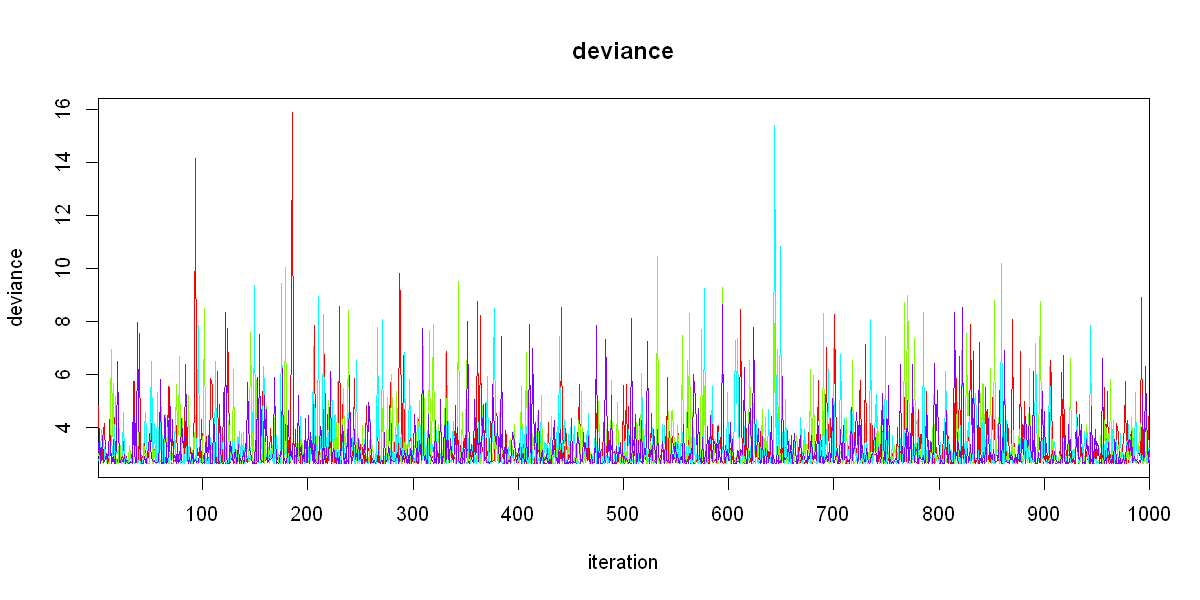

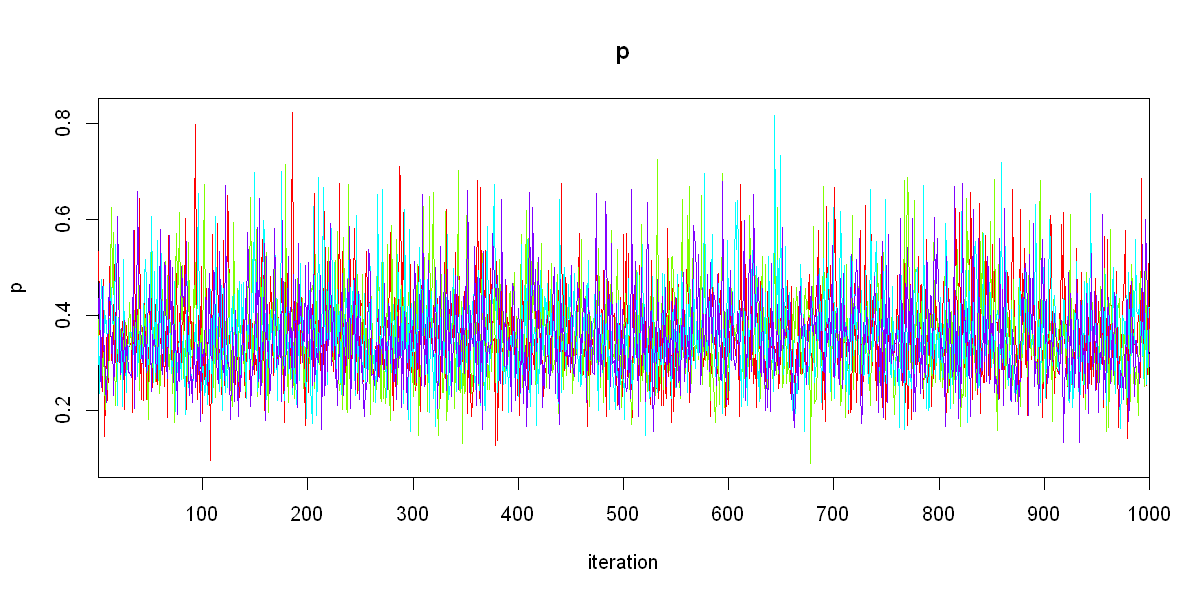

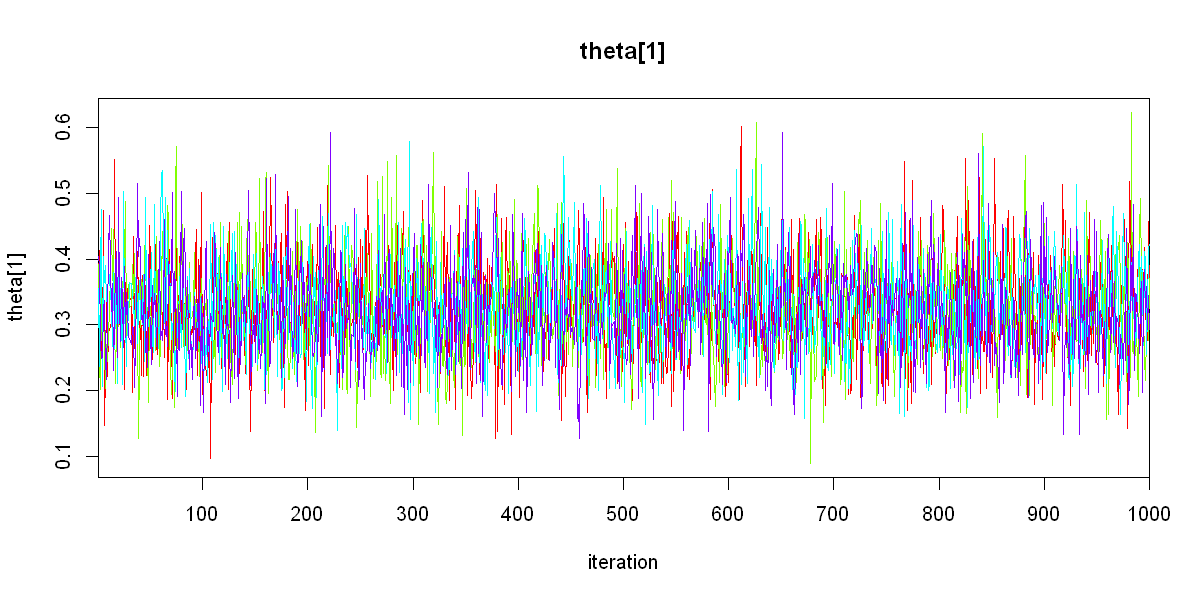

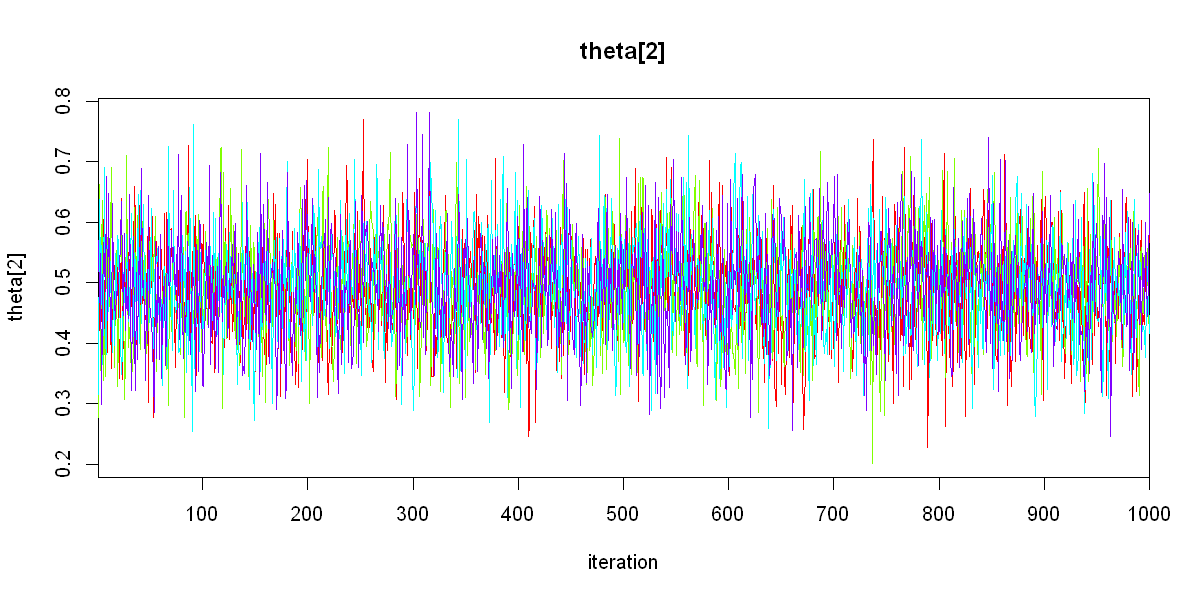

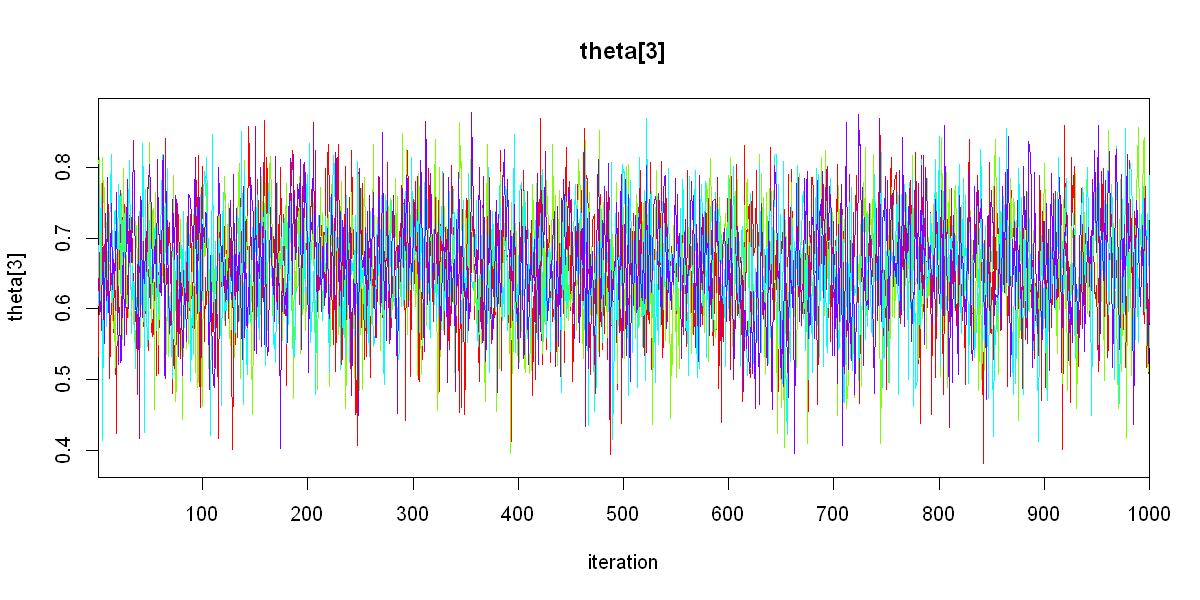

In [64]:
options(repr.plot.width=10,repr.plot.height=5)
traceplot(Mix.01.m1)

In [65]:
p.sample<-Mix.01.m1$BUGSoutput$sims.list$p

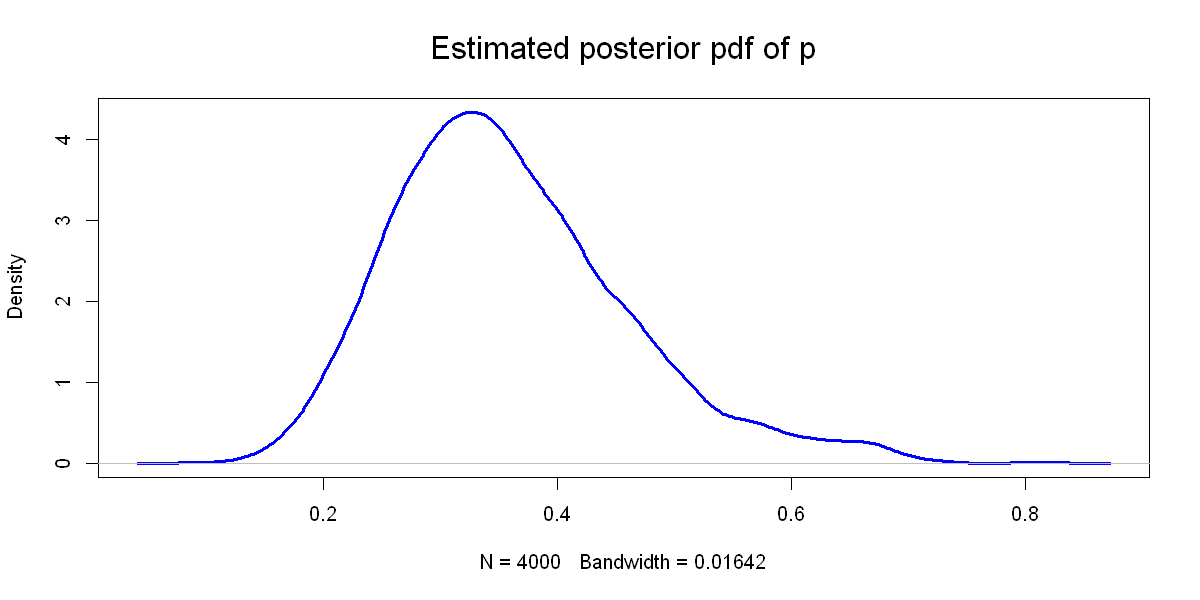

In [66]:
# Posterior PDF plot
p.sample.density<-density(p.sample)
plot(p.sample.density,lwd=2.5,col="blue",main=expression(paste("Estimated posterior pdf of ",p)),cex.main=1.6)

### Analysis of posterior quantities 

[1] "Simulated MAP: 0.327"


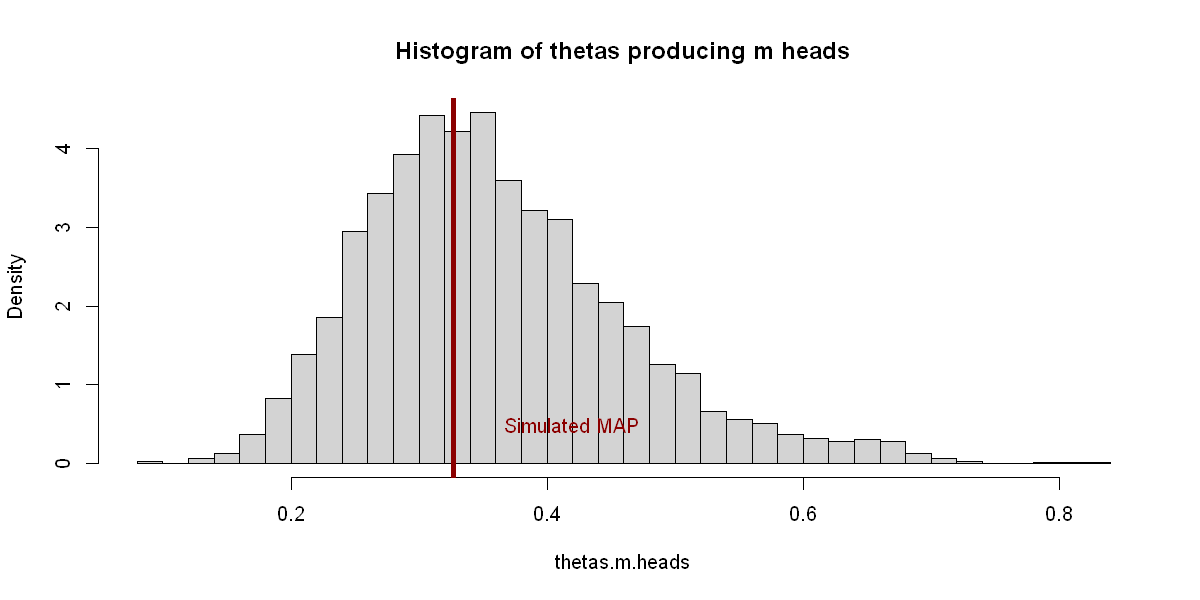

In [67]:
# Finding the maximum a posteriori (MAP)
thetas.m.heads<-p.sample
thetas.m.heads.density<-density(p.sample)
Sim.MAP <- thetas.m.heads.density$x[which.max(thetas.m.heads.density$y)]
hist(thetas.m.heads, breaks=50, freq=FALSE, main="Histogram of thetas producing m heads")
abline(v=Sim.MAP,col="DarkRed",lwd=4)
text(0.42, 0.5, "Simulated MAP", col="DarkRed")
lines(thetas.m.heads.density$x,thetas.m.heads.density$y,lwd=2.5,col="DarkGreen")
print(paste0("Simulated MAP: ", round(Sim.MAP,3)))

In [68]:
# Simulated Expectation
print(paste0("Simulation based posterior expectation:",round(mean(thetas.m.heads),3)))

# Simulated Variance
print(paste0("Simulation based posterior variance:",round(var(thetas.m.heads),3)))


# Simulated Quantiles
print("Simulation based posterior quantiles:")
quantiles <- quantile(thetas.m.heads,c(0,0.25,0.50,0.75,1))
round(quantiles,4)

[1] "Simulation based posterior expectation:0.36"
[1] "Simulation based posterior variance:0.01"
[1] "Simulation based posterior quantiles:"


0%    25%    50%    75%   100% 
0.0898 0.2874 0.3461 0.4158 0.8237

In [12]:
# 90% credible interval for theta
y.max<-max(thetas.m.heads.density$y)
gamma <- 0.9
Sim.gamma <-function(s){
    CI.thetas<-(thetas.m.heads.density$x)[which(thetas.m.heads.density$y>=(y.max-s))]
    return(sum((min(CI.thetas)<=thetas.m.heads)&(thetas.m.heads<=max(CI.thetas)))/length(thetas.m.heads)-gamma)
    }
G.s <- uniroot(Sim.gamma,c(0,y.max))
Sim.s<-G.s$root
round(Sim.s,4)

CI.thetas<-(thetas.m.heads.density$x)[which(thetas.m.heads.density$y>=(y.max-Sim.s))]
Credible.Interval <-c(min(CI.thetas),max(CI.thetas))
cat(sprintf("Credible interval 03 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval[1],4),round(Credible.Interval[2],4)))
width <-diff(Credible.Interval)
print(paste("CI width:",round(width,4)))

Credible interval 03 (90.00 %): (0.1965, 0.5249)[1] "CI width: 0.3284"


## Comparison of MAP + Density plots of each Bayesian analysis

As we can see below, we got similar values and plots in all cases.

| Study                                 | MAP   | Posterior Expectation | Posterior Variance |
|---------------------------------------|-------|-----------------------|--------------------|
| 2.1: Using the theoretical formulas   | 0.323 |                  0.36 |               0.01 |
| 2.2: Using a grid approximation       | 0.323 |                 0.361 |               0.01 |
| 2.3: Using independent random numbers | 0.326 |                 0.363 |              0.011 |
| 2.4: Using JAGS                       | 0.327 |                  0.36 |               0.01 |

### 2.1: Using the theoretical formulas

<img src="img/Density2.1.JPG">



### 2.2: Using a grid approximation

<img src="img/Density2.2.JPG">



### 2.3: Using independent random numbers

<img src="img/Density2.3.png">

### 2.4: Using JAGS

<img src="img/Density2.4.jpg">

